# Pipeline

See [usage](https://among.github.io/fusus/use/).

See [example](https://github.com/among/fusus/blob/master/example/doExample.ipynb).

How to read this notebook:

1.  *best experience*
    get this repository on your computer and run `jupyter lab`.
    Also install the table of contents extension in Jupyter Lab, since this is a lengthy notebook
    You can run the code cells now.
1.  *good reading experience*
    read it on [NbViewer](https://nbviewer.jupyter.org/github/among/fusus/blob/master/example/doExample.ipynb)
1.  *suboptimal*
    read it directly on [GitHub](https://github.com/among/fusus/blob/master/example/doExample.ipynb)
    (long time to load)

# The beginning

Enable autoloading of changed code.

Change the directory to where this notebook resides on disk, i.e. near the book's scanned pages directory.

In [1]:
%load_ext autoreload
%autoreload 2
!cd `pwd`

Import the fusus package (see [install](https://among.github.io/fusus/about/install.html)).

In [2]:
from fusus.book import Book

Initialize the processing line.

In [3]:
B = Book()

  0.06s Loading for Kraken: ~/github/among/fusus/model/arabic_generalized.mlmodel
  1.05s model loaded


# Task runner

The following function runs the pipeline for one or more pages.

If all pages are selected, batch mode is on.

In [4]:
def size(pg):
    return dict(sizeW=0.5 if pg == 999 else None, sizeH=0.1 if pg == 999 else None)


def checkOcr(pg, quiet=True, **kwargs):
    if pg is None:
        for pg in B.allPagesList:
            page = B.process(
                batch=True,
                pages=pg,
                doOcr=True,
                quiet=quiet,
                **size(pg),
                **kwargs,
            )
            page.show(stage="proofword")
    else:
        page = B.process(
            batch=False,
            pages=pg,
            doOcr=True,
            quiet=quiet,
            **size(pg),
            **kwargs,
        )
        page.show(stage="word")
        page.show(stage="proofword")
    return page

# Check a single page

Our first example is page 132.

The ocr result is shown in data form and as a proof page.

In [5]:
page = checkOcr(132)

  0.00s Batch of 1 pages: 132
  0.00s Start batch processing images
   |     6.14s     1 132.jpg                                 
  6.14s all done
stripe	column	line	left	top	right	bottom	confidence	text
1	l	1	969	373	1032	449	100	أعم
1	l	1	905	373	952	449	100	من
1	l	1	716	373	888	449	89	المبادىء
1	l	1	613	373	682	449	98	وهو
1	l	1	557	373	596	449	99	ما
1	l	1	445	373	547	449	89	يتوقف
1	l	1	342	373	413	449	100	عليه
1	l	1	190	373	332	449	98	المسائل
1	l	1	122	373	170	449	100	بلا
1	l	2	905	458	1028	544	96	واسطة
1	l	2	705	458	866	544	97	والمقدمة
1	l	2	652	458	684	544	100	ما
1	l	2	536	458	642	544	92	يتوقف
1	l	2	427	458	497	544	98	عليه
1	l	2	277	458	414	544	99	المسائل
1	l	2	122	458	252	544	95	بواسطة
1	l	3	997	553	1031	636	100	أو
1	l	3	944	553	979	636	100	لا
1	l	3	809	553	926	636	95	واسطة
1	l	3	790	553	798	636	99	.
1	l	3	373	553	772	636	87	فتأمل!
1	r	1	2003	380	2081	456	100	أعـم
1	r	1	1928	380	1988	456	100	من
1	r	1	1777	380	1909	456	88	مقدمة
1	r	1	1648	380	1768	456	99	العلم
1	r	1	1500	380	1617	

We can also request the ocr result at character level:

In [6]:
page.show(stage="char")

stripe	column	line	left	top	right	bottom	confidence	text
1	l	1	1024	373	1032	449	100	ا
1	l	1	1011	373	1025	449	99	ٔ
1	l	1	991	373	1011	449	100	ع
1	l	1	969	373	990	449	100	م
1	l	1	953	373	970	449	100	 
1	l	1	929	373	952	449	100	م
1	l	1	905	373	928	449	100	ن
1	l	1	887	373	904	449	100	 
1	l	1	880	373	888	449	81	ا
1	l	1	860	373	881	449	100	ل
1	l	1	840	373	860	449	77	م
1	l	1	822	373	839	449	100	ب
1	l	1	802	373	822	449	100	ا
1	l	1	781	373	801	449	53	د
1	l	1	750	373	781	449	100	ى
1	l	1	716	373	750	449	100	ء
1	l	1	681	373	716	449	100	 
1	l	1	657	373	682	449	100	و
1	l	1	634	373	658	449	99	ه
1	l	1	613	373	633	449	95	و
1	l	1	596	373	613	449	100	 
1	l	1	575	373	596	449	100	م
1	l	1	557	373	575	449	98	ا
1	l	1	548	373	558	449	100	 
1	l	1	534	373	547	449	100	ي
1	l	1	520	373	534	449	93	ت
1	l	1	499	373	520	449	100	و
1	l	1	479	373	500	449	54	ق
1	l	1	445	373	479	449	100	ف
1	l	1	414	373	444	449	100	 
1	l	1	390	373	413	449	100	ع
1	l	1	369	373	390	449	100	ل
1	l	1	356	373	369	449	100	ي
1	l	1	342	373	355	449	1

And there is a proof page at character level.

In the output you'll see a link to the proof page.
When you are in Jupyter Lab, it opens the link in a new tab *within* the lab interface,
and that will not render the page properly.

**Workaround**: shift-right-click the link and select *open in a new tab*.
Now the proof page is opened in a proper new browser tab, and there you can zoom in and out ad-lib.

In [7]:
page.show(stage="proofchar")

And by the way, here are the coordinates of the lines that have been OCRed:

In [8]:
page.show(stage="line")

stripe	column	line	left	top	right	bottom
1	l	1	122	373	1035	448
1	l	2	122	458	1035	543
1	l	3	373	553	1035	635
1	r	1	1169	380	2084	455
1	r	2	1948	471	2084	540
1	r	3	1184	550	1976	642
2		1	563	3068	1671	3178


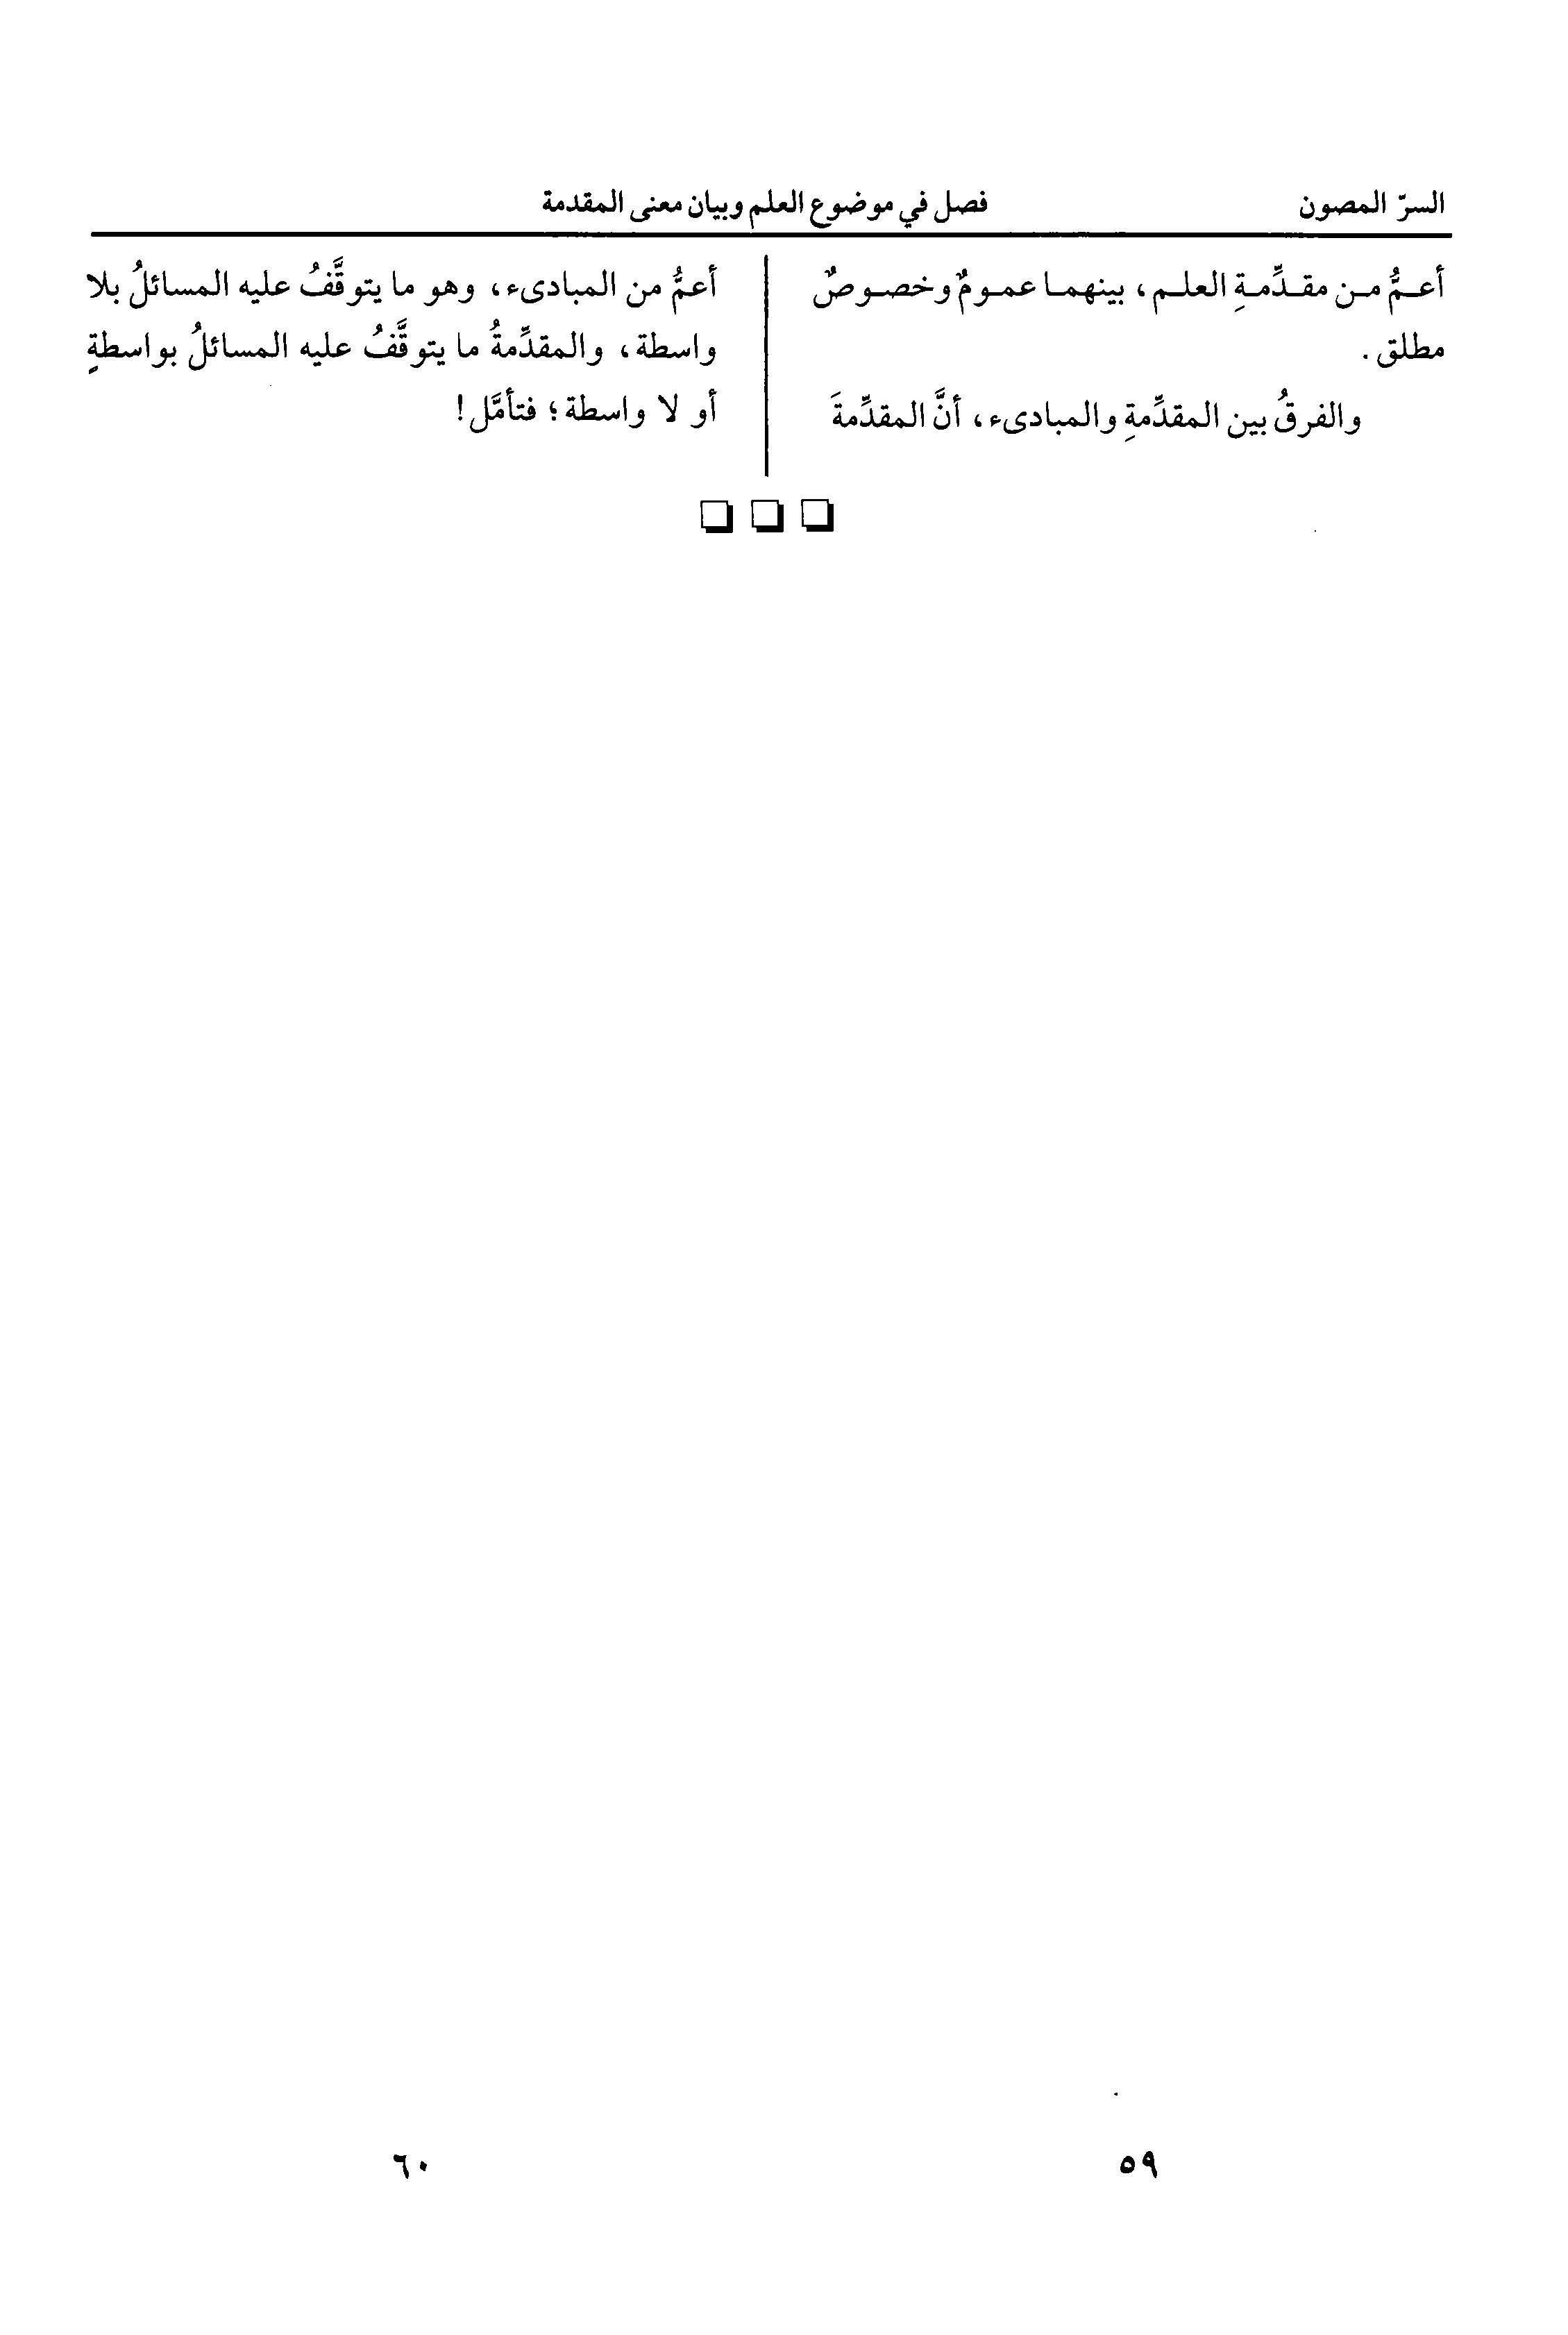

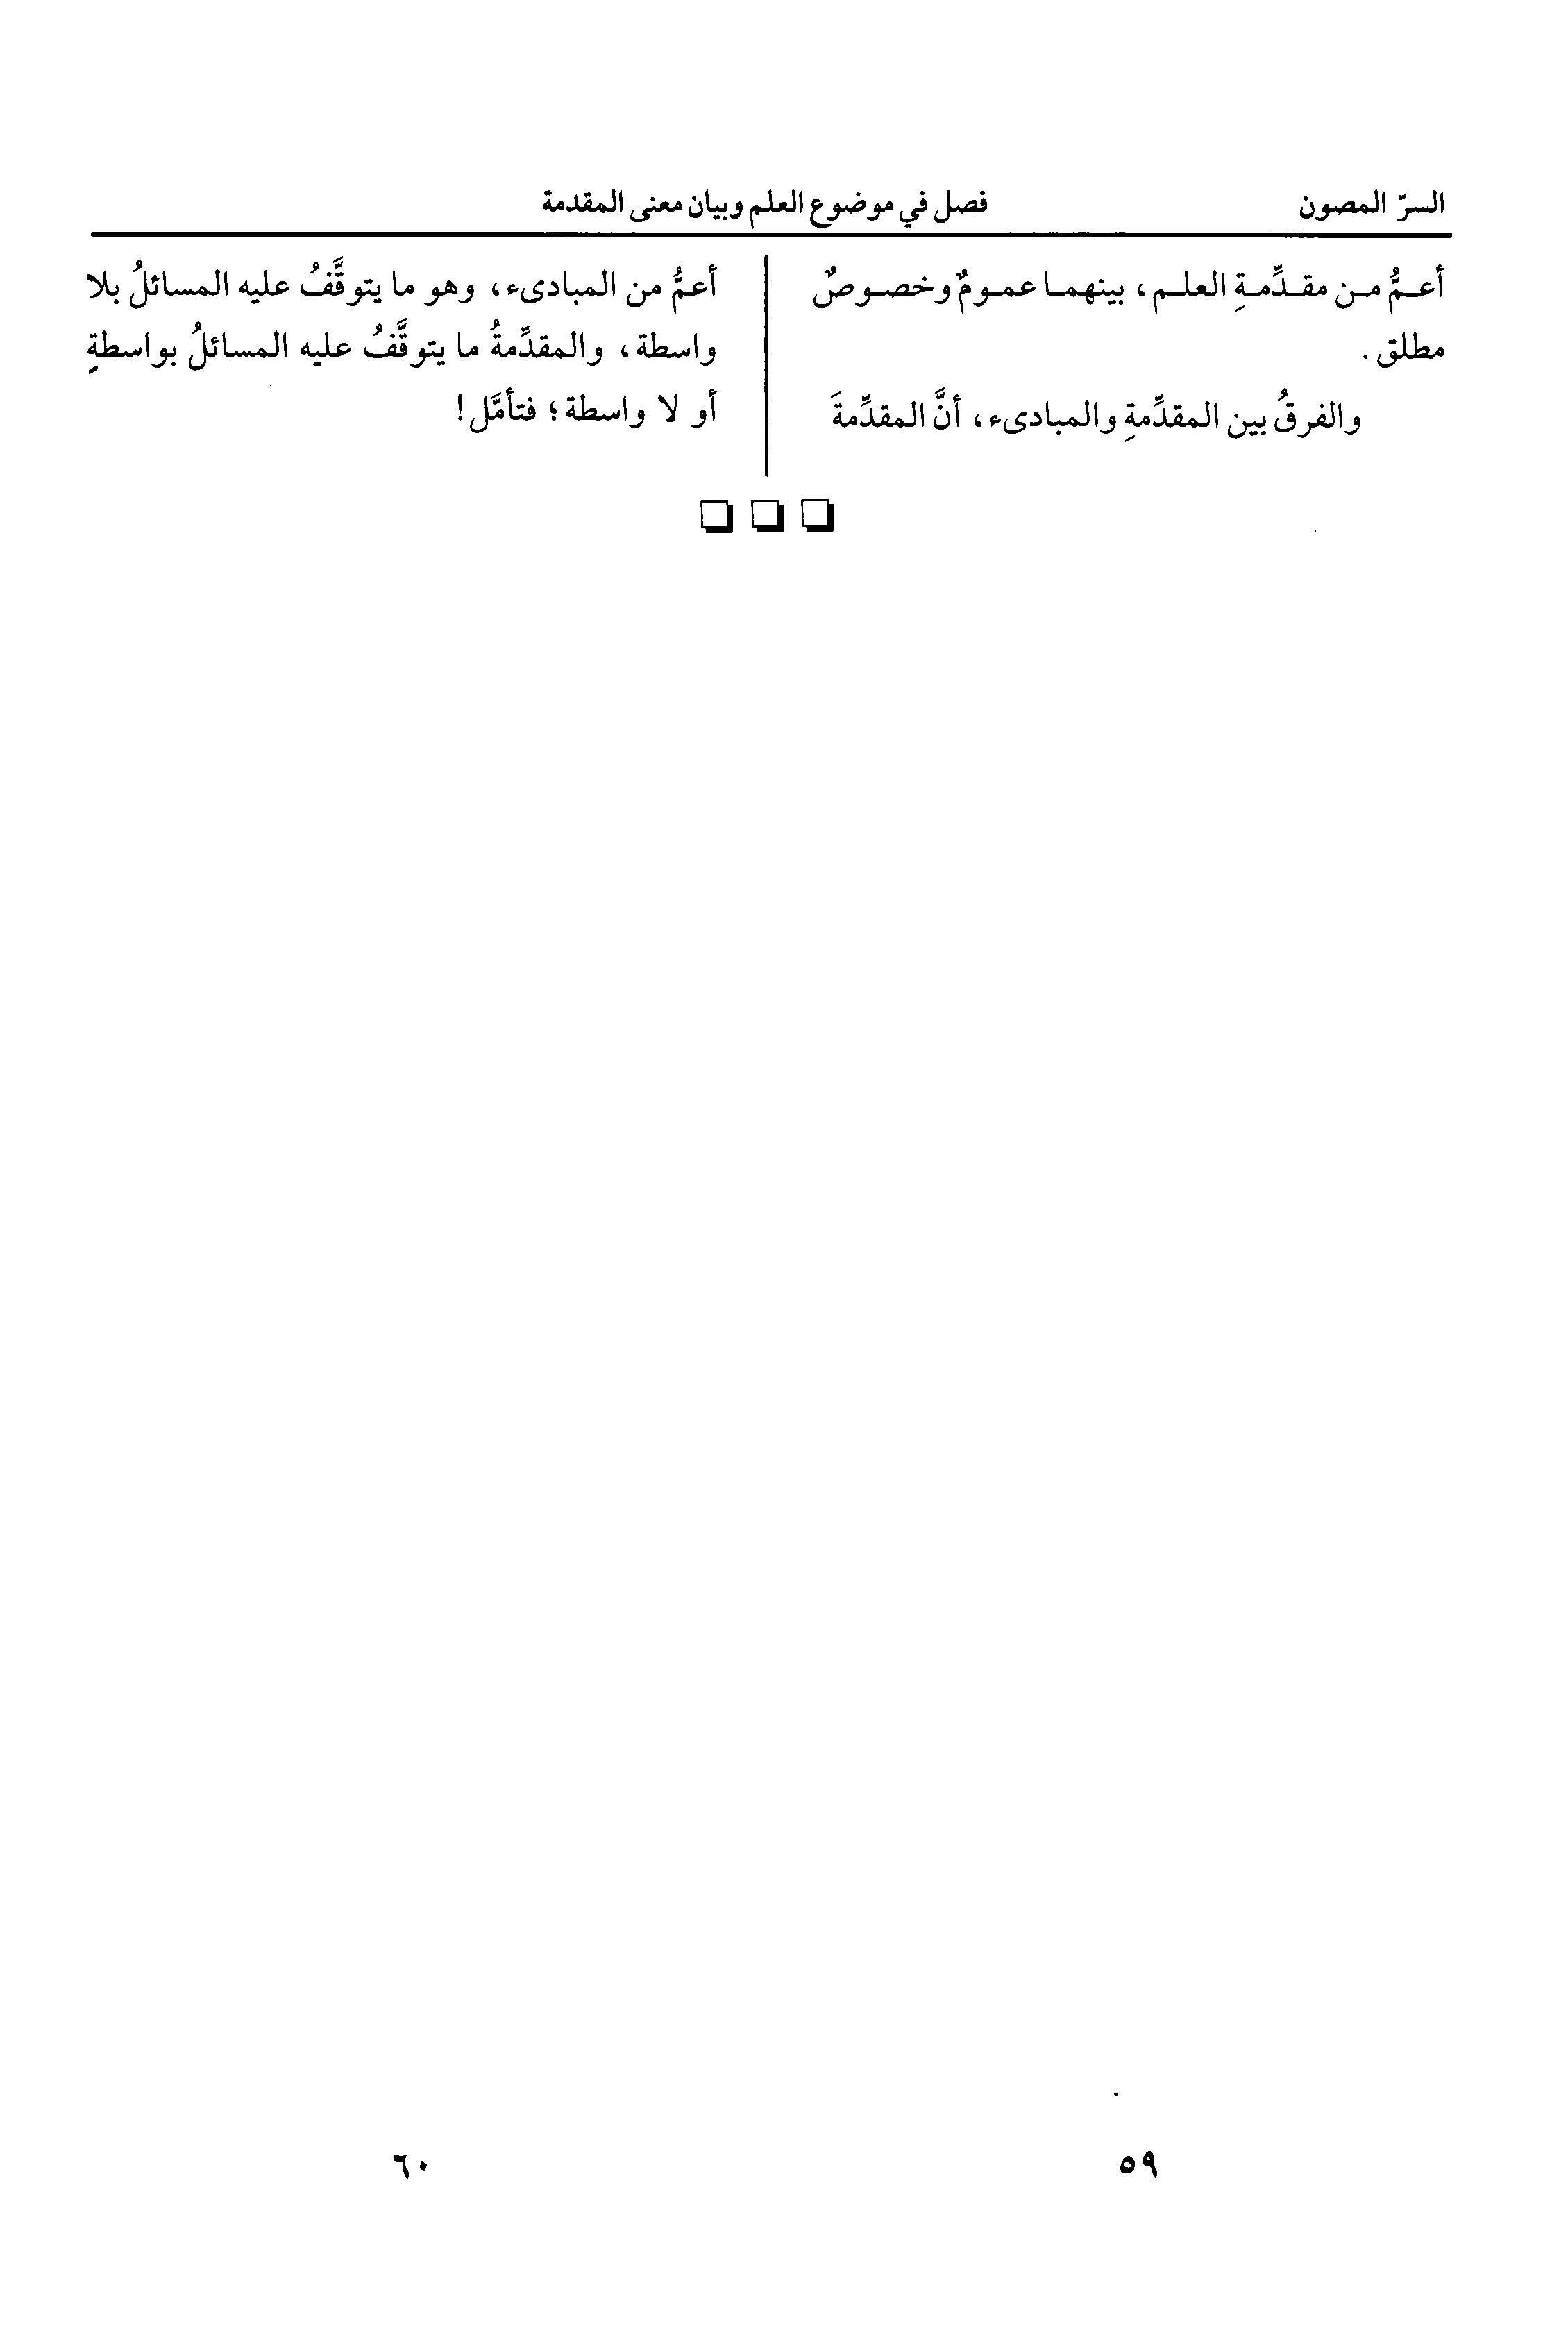

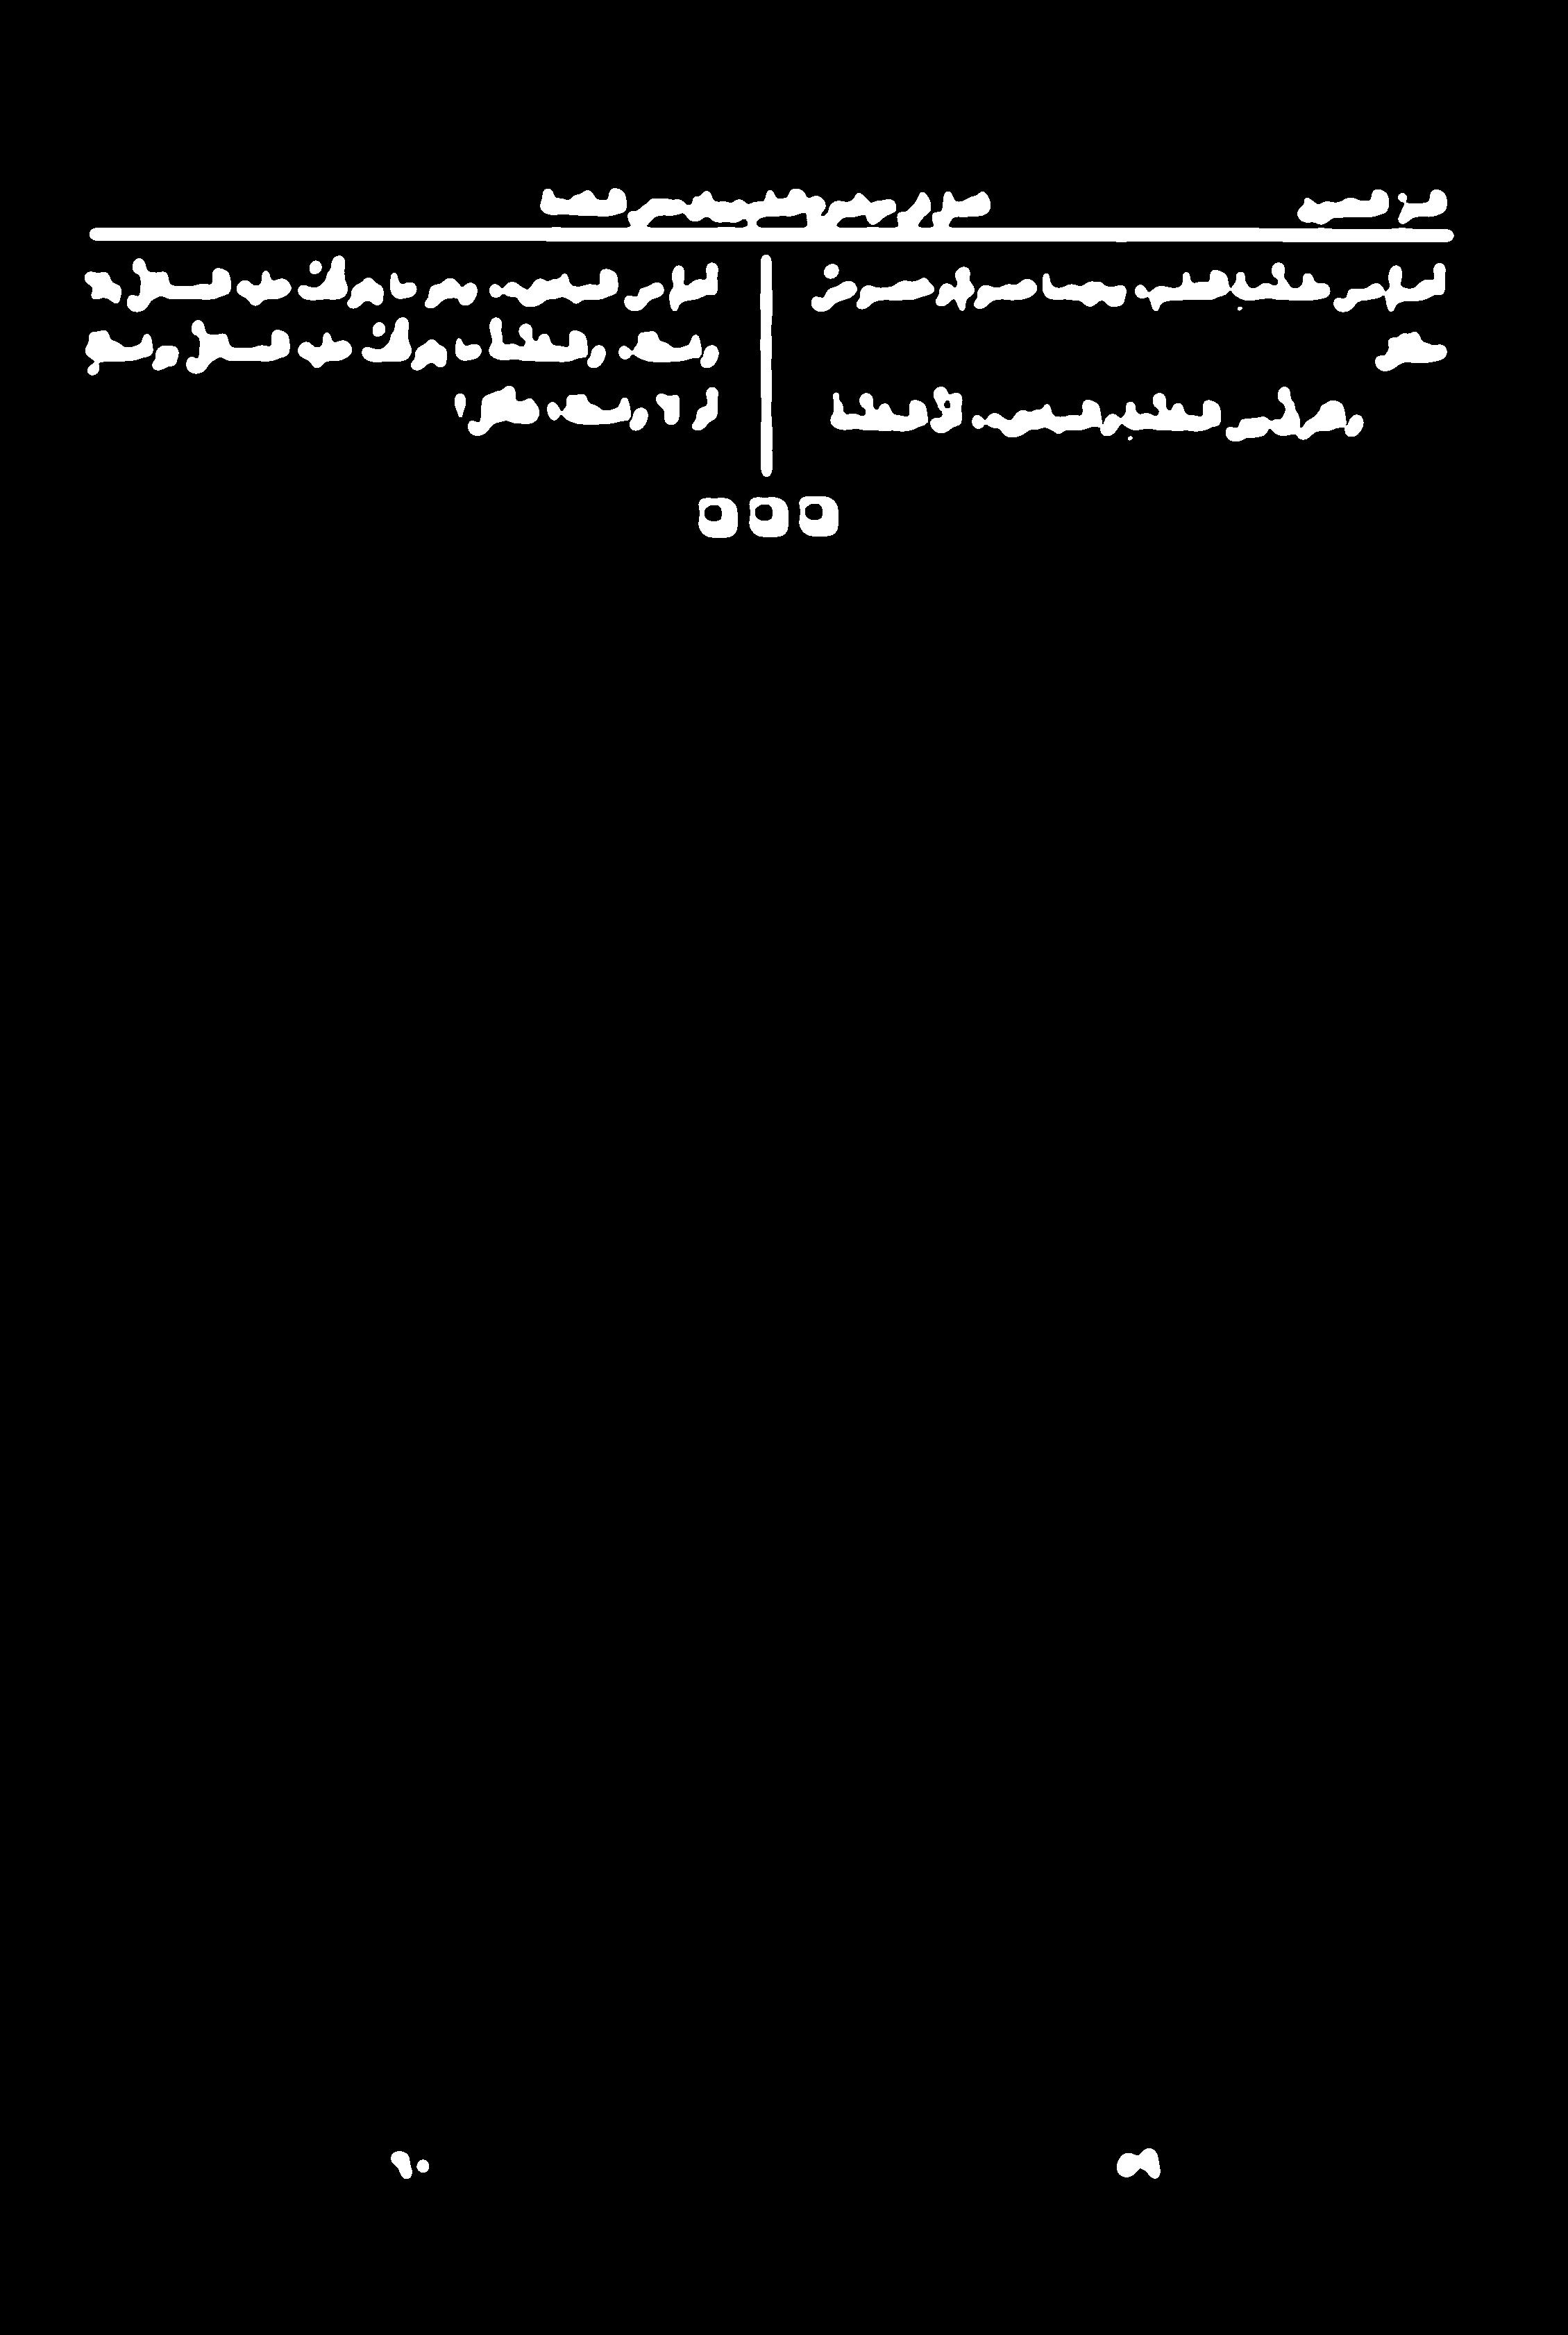

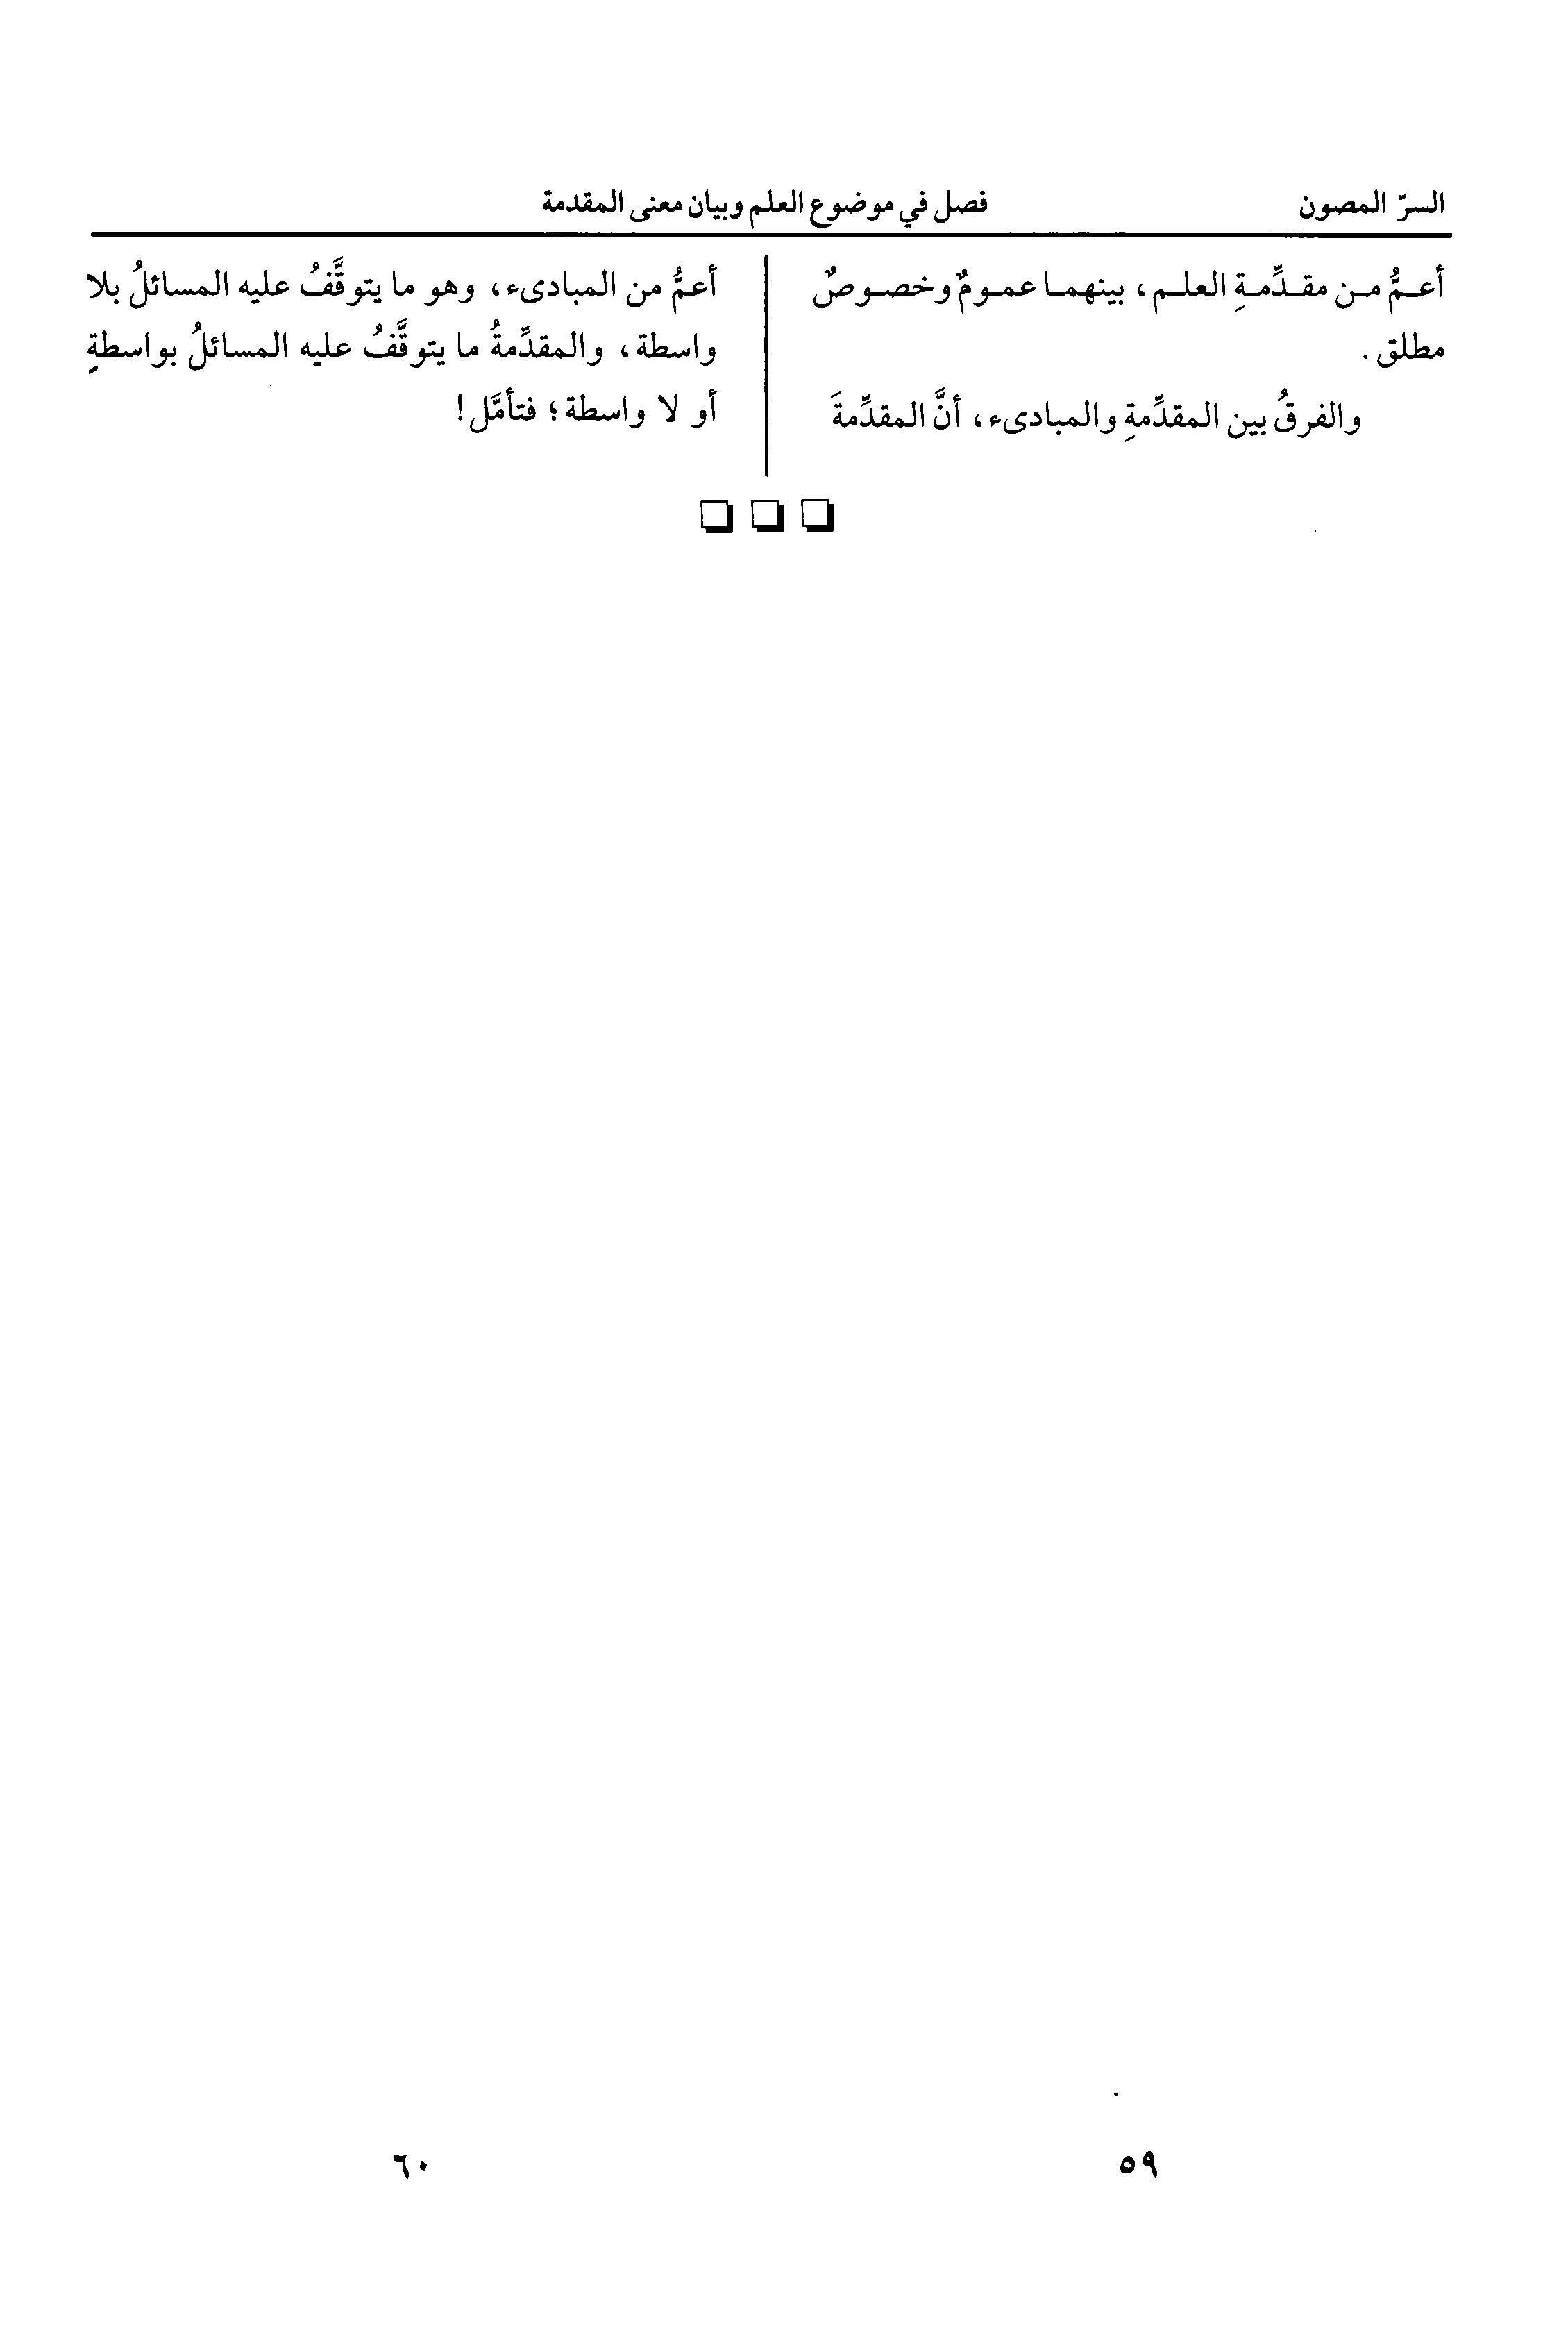

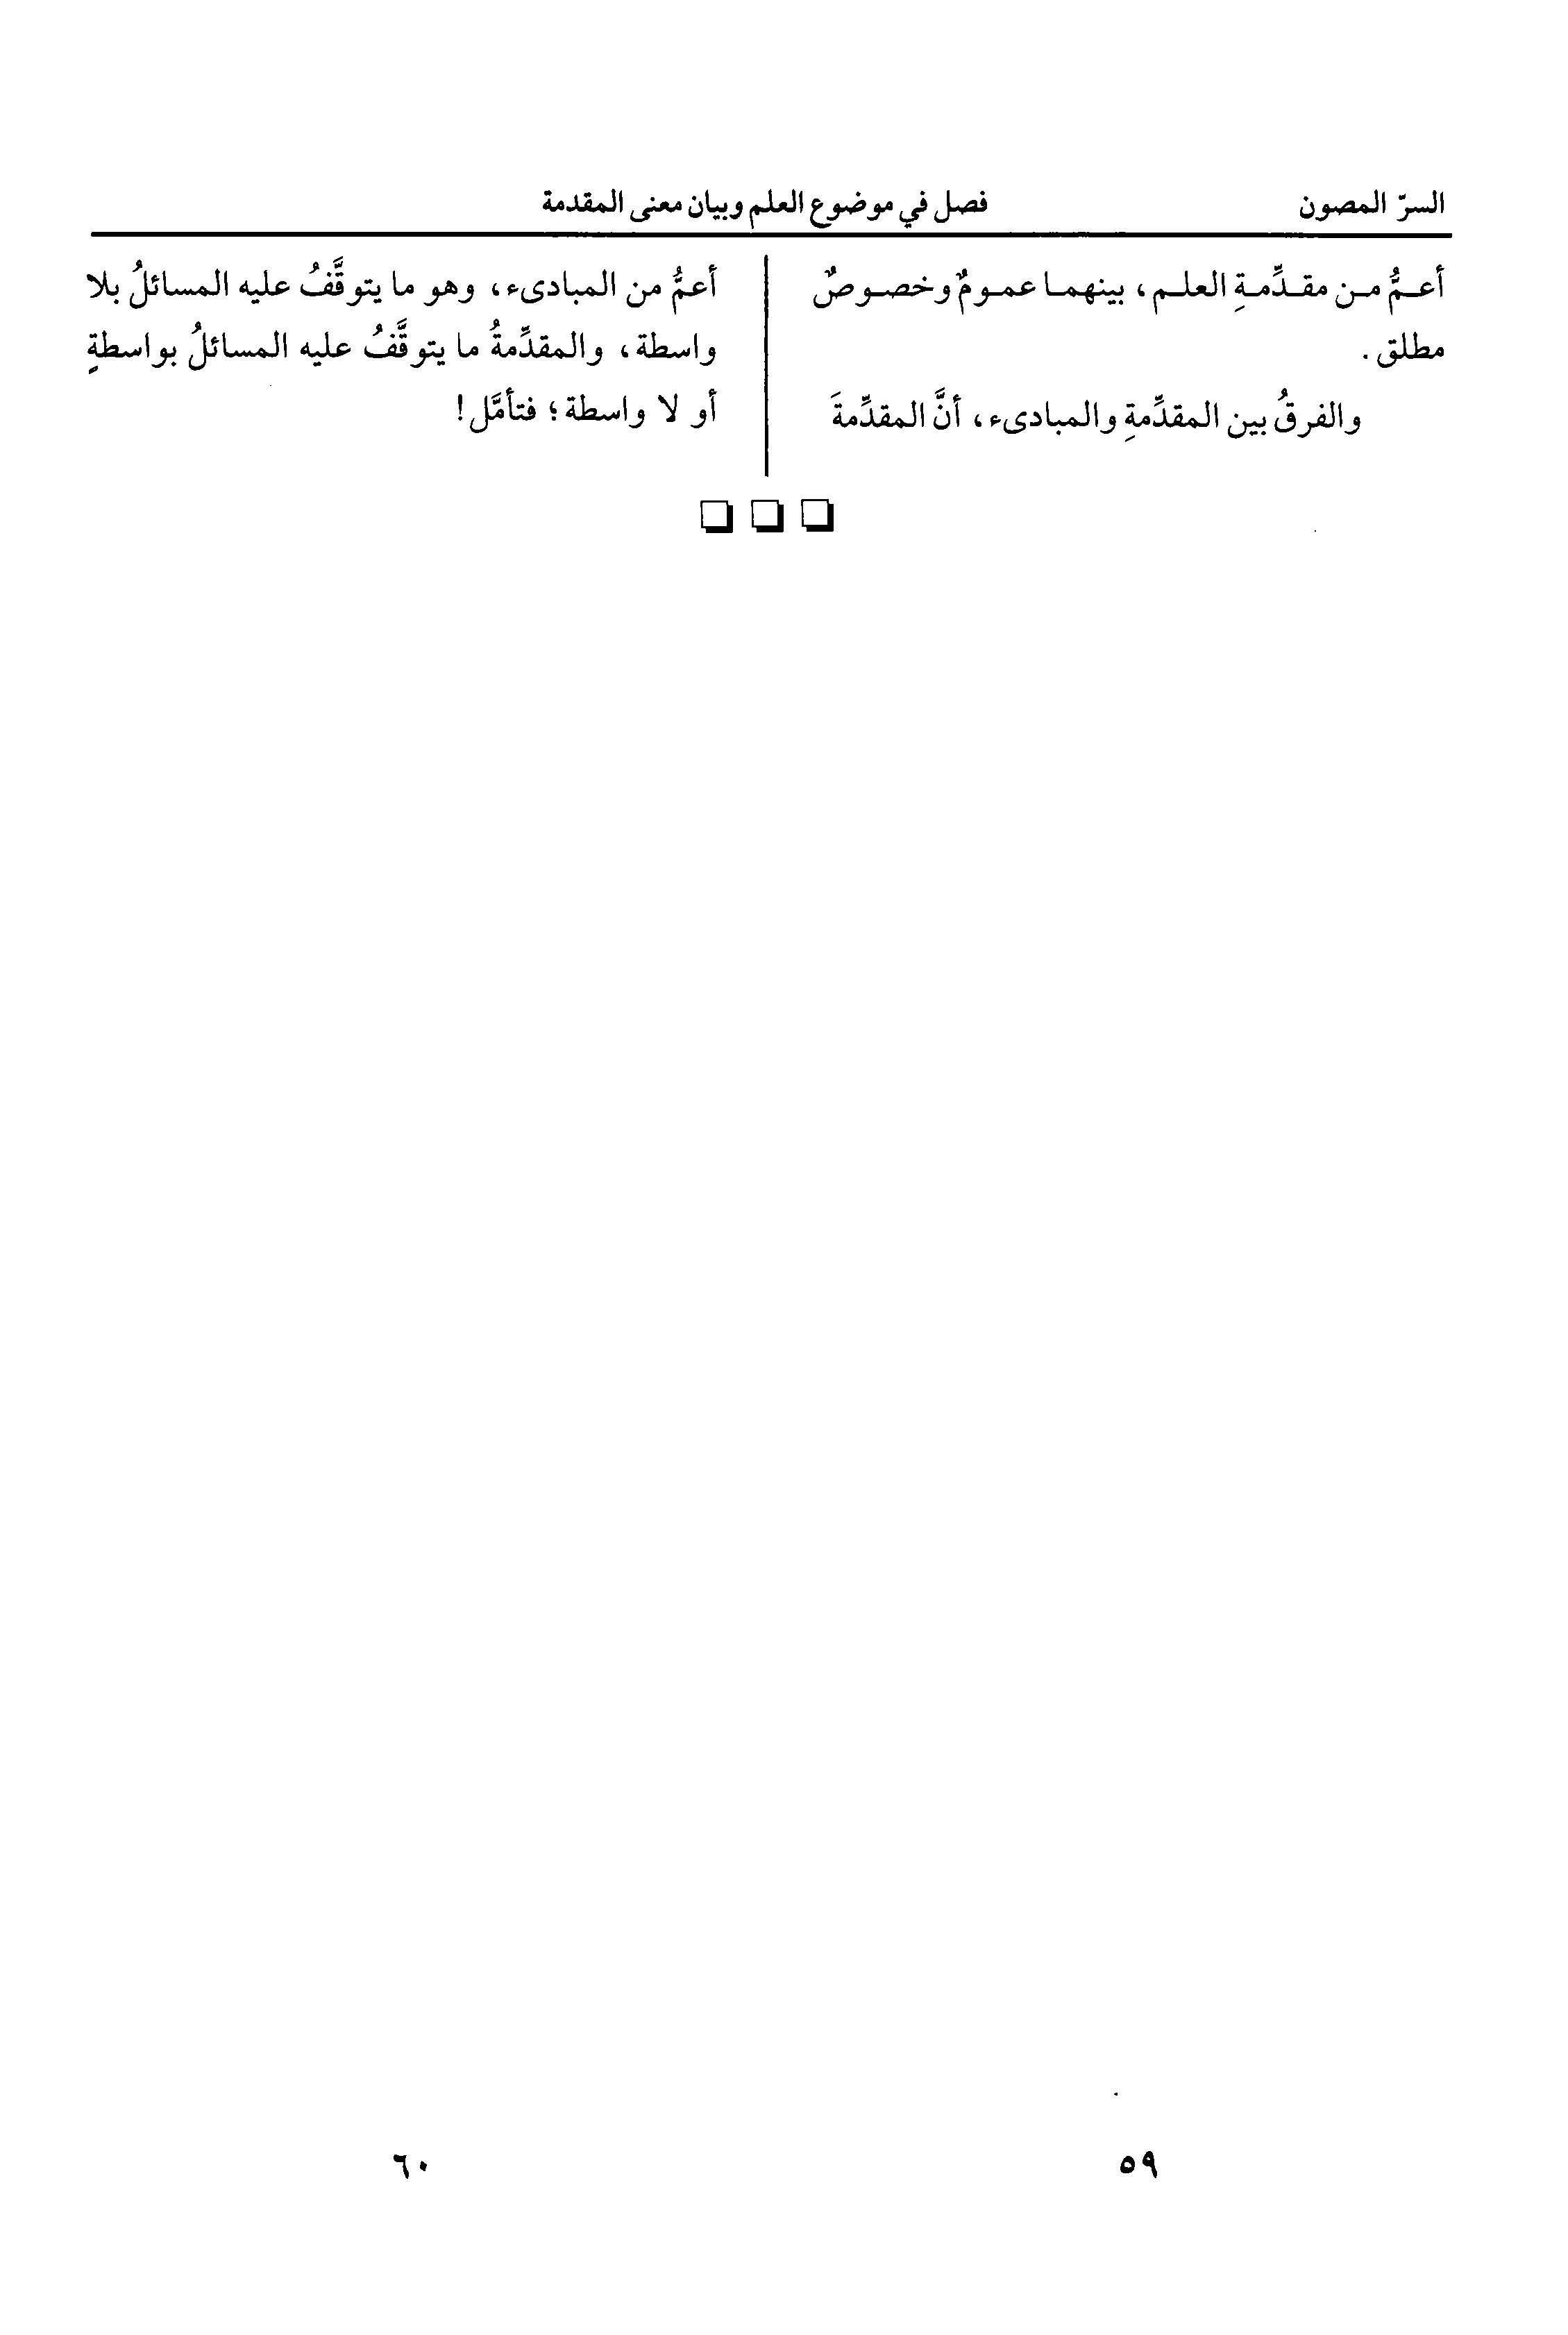

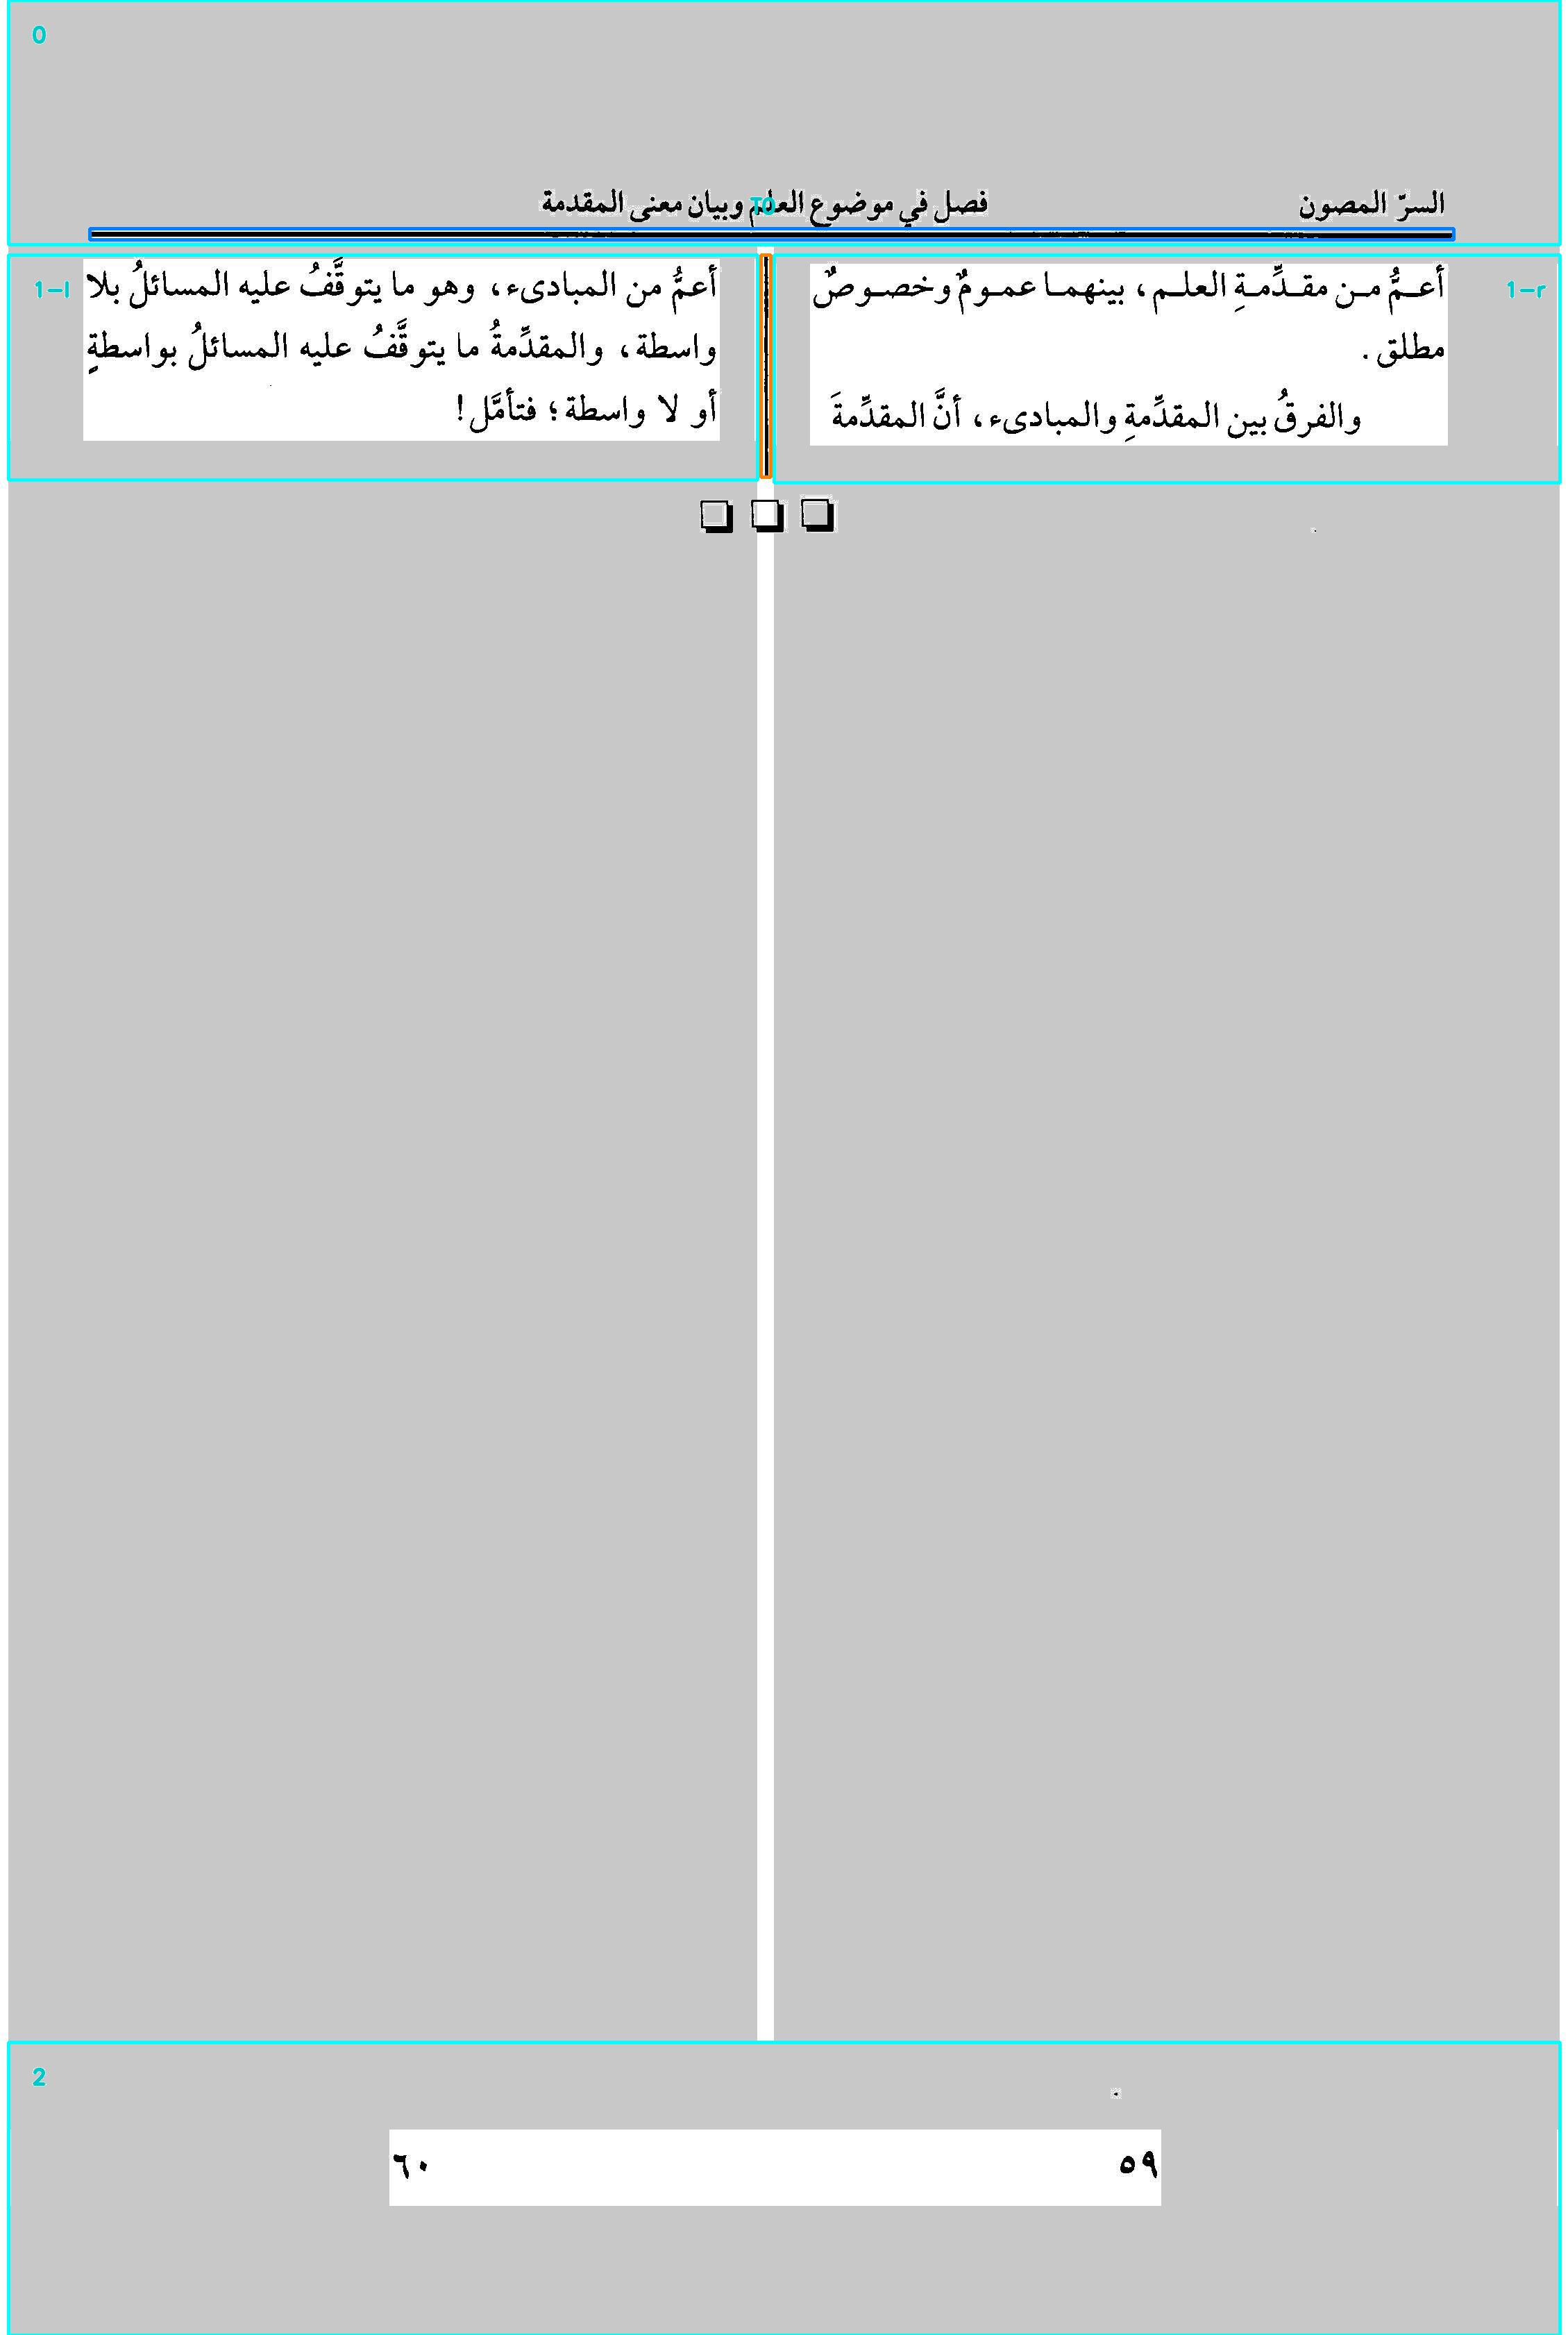

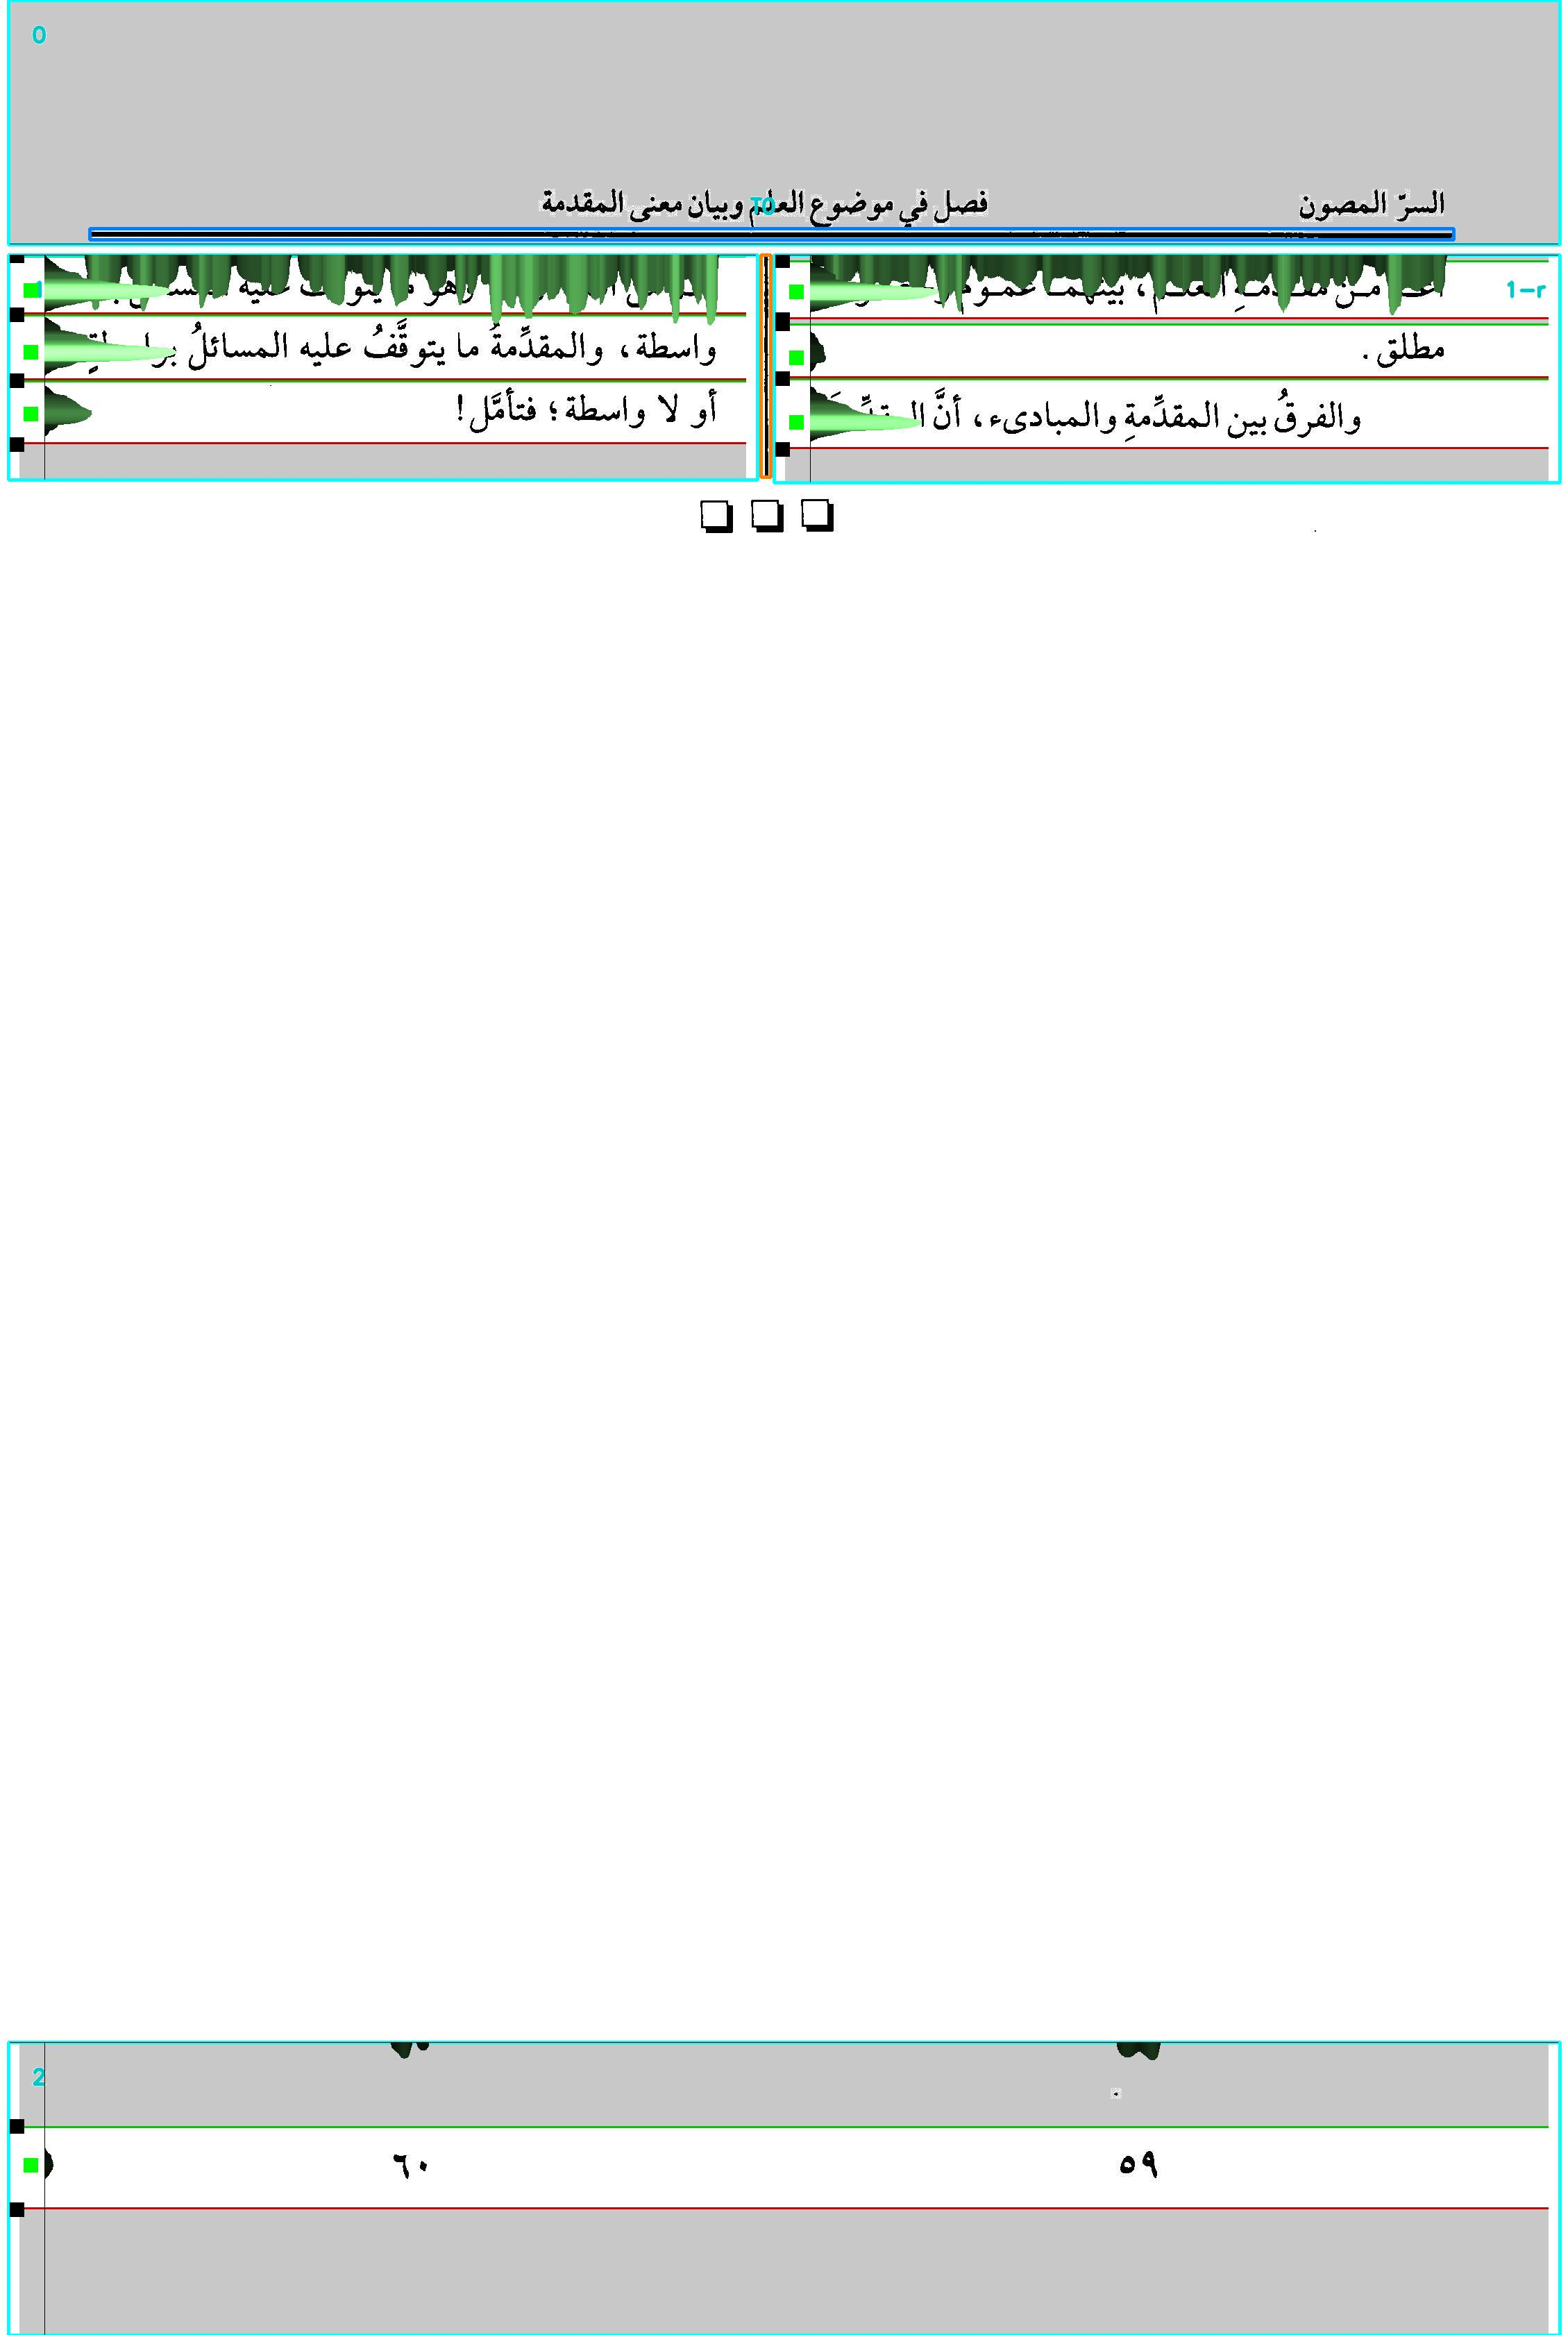

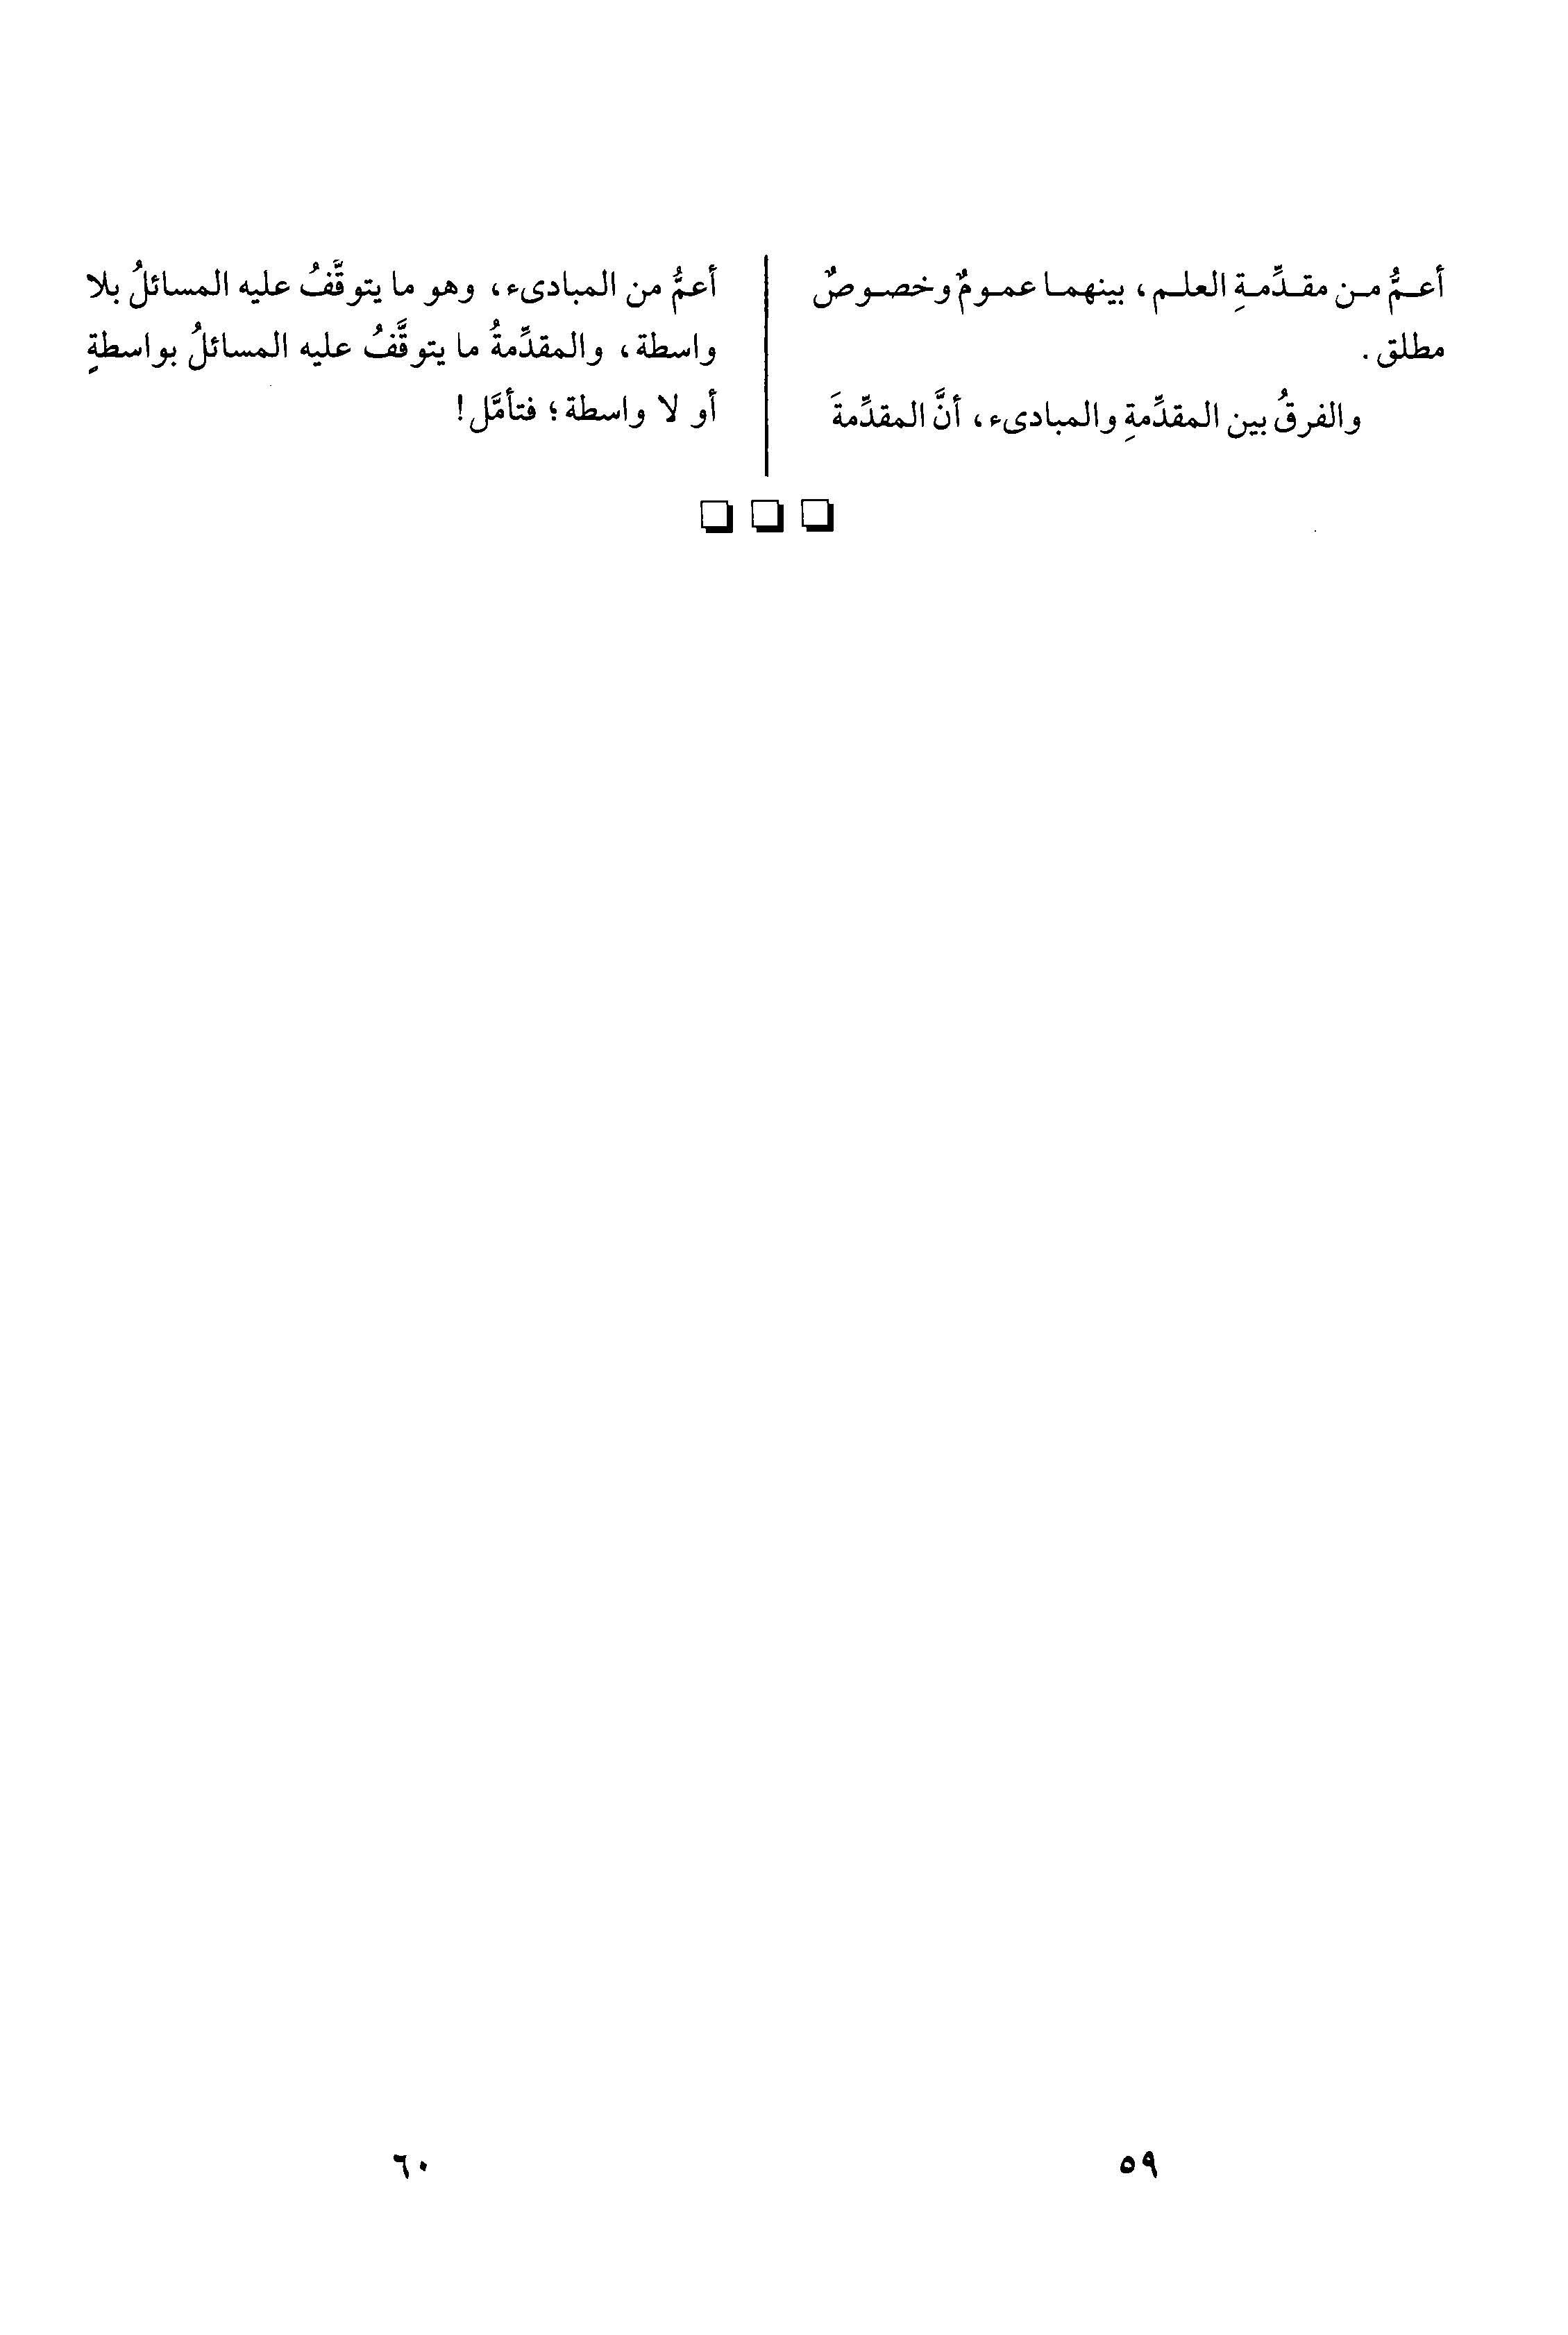

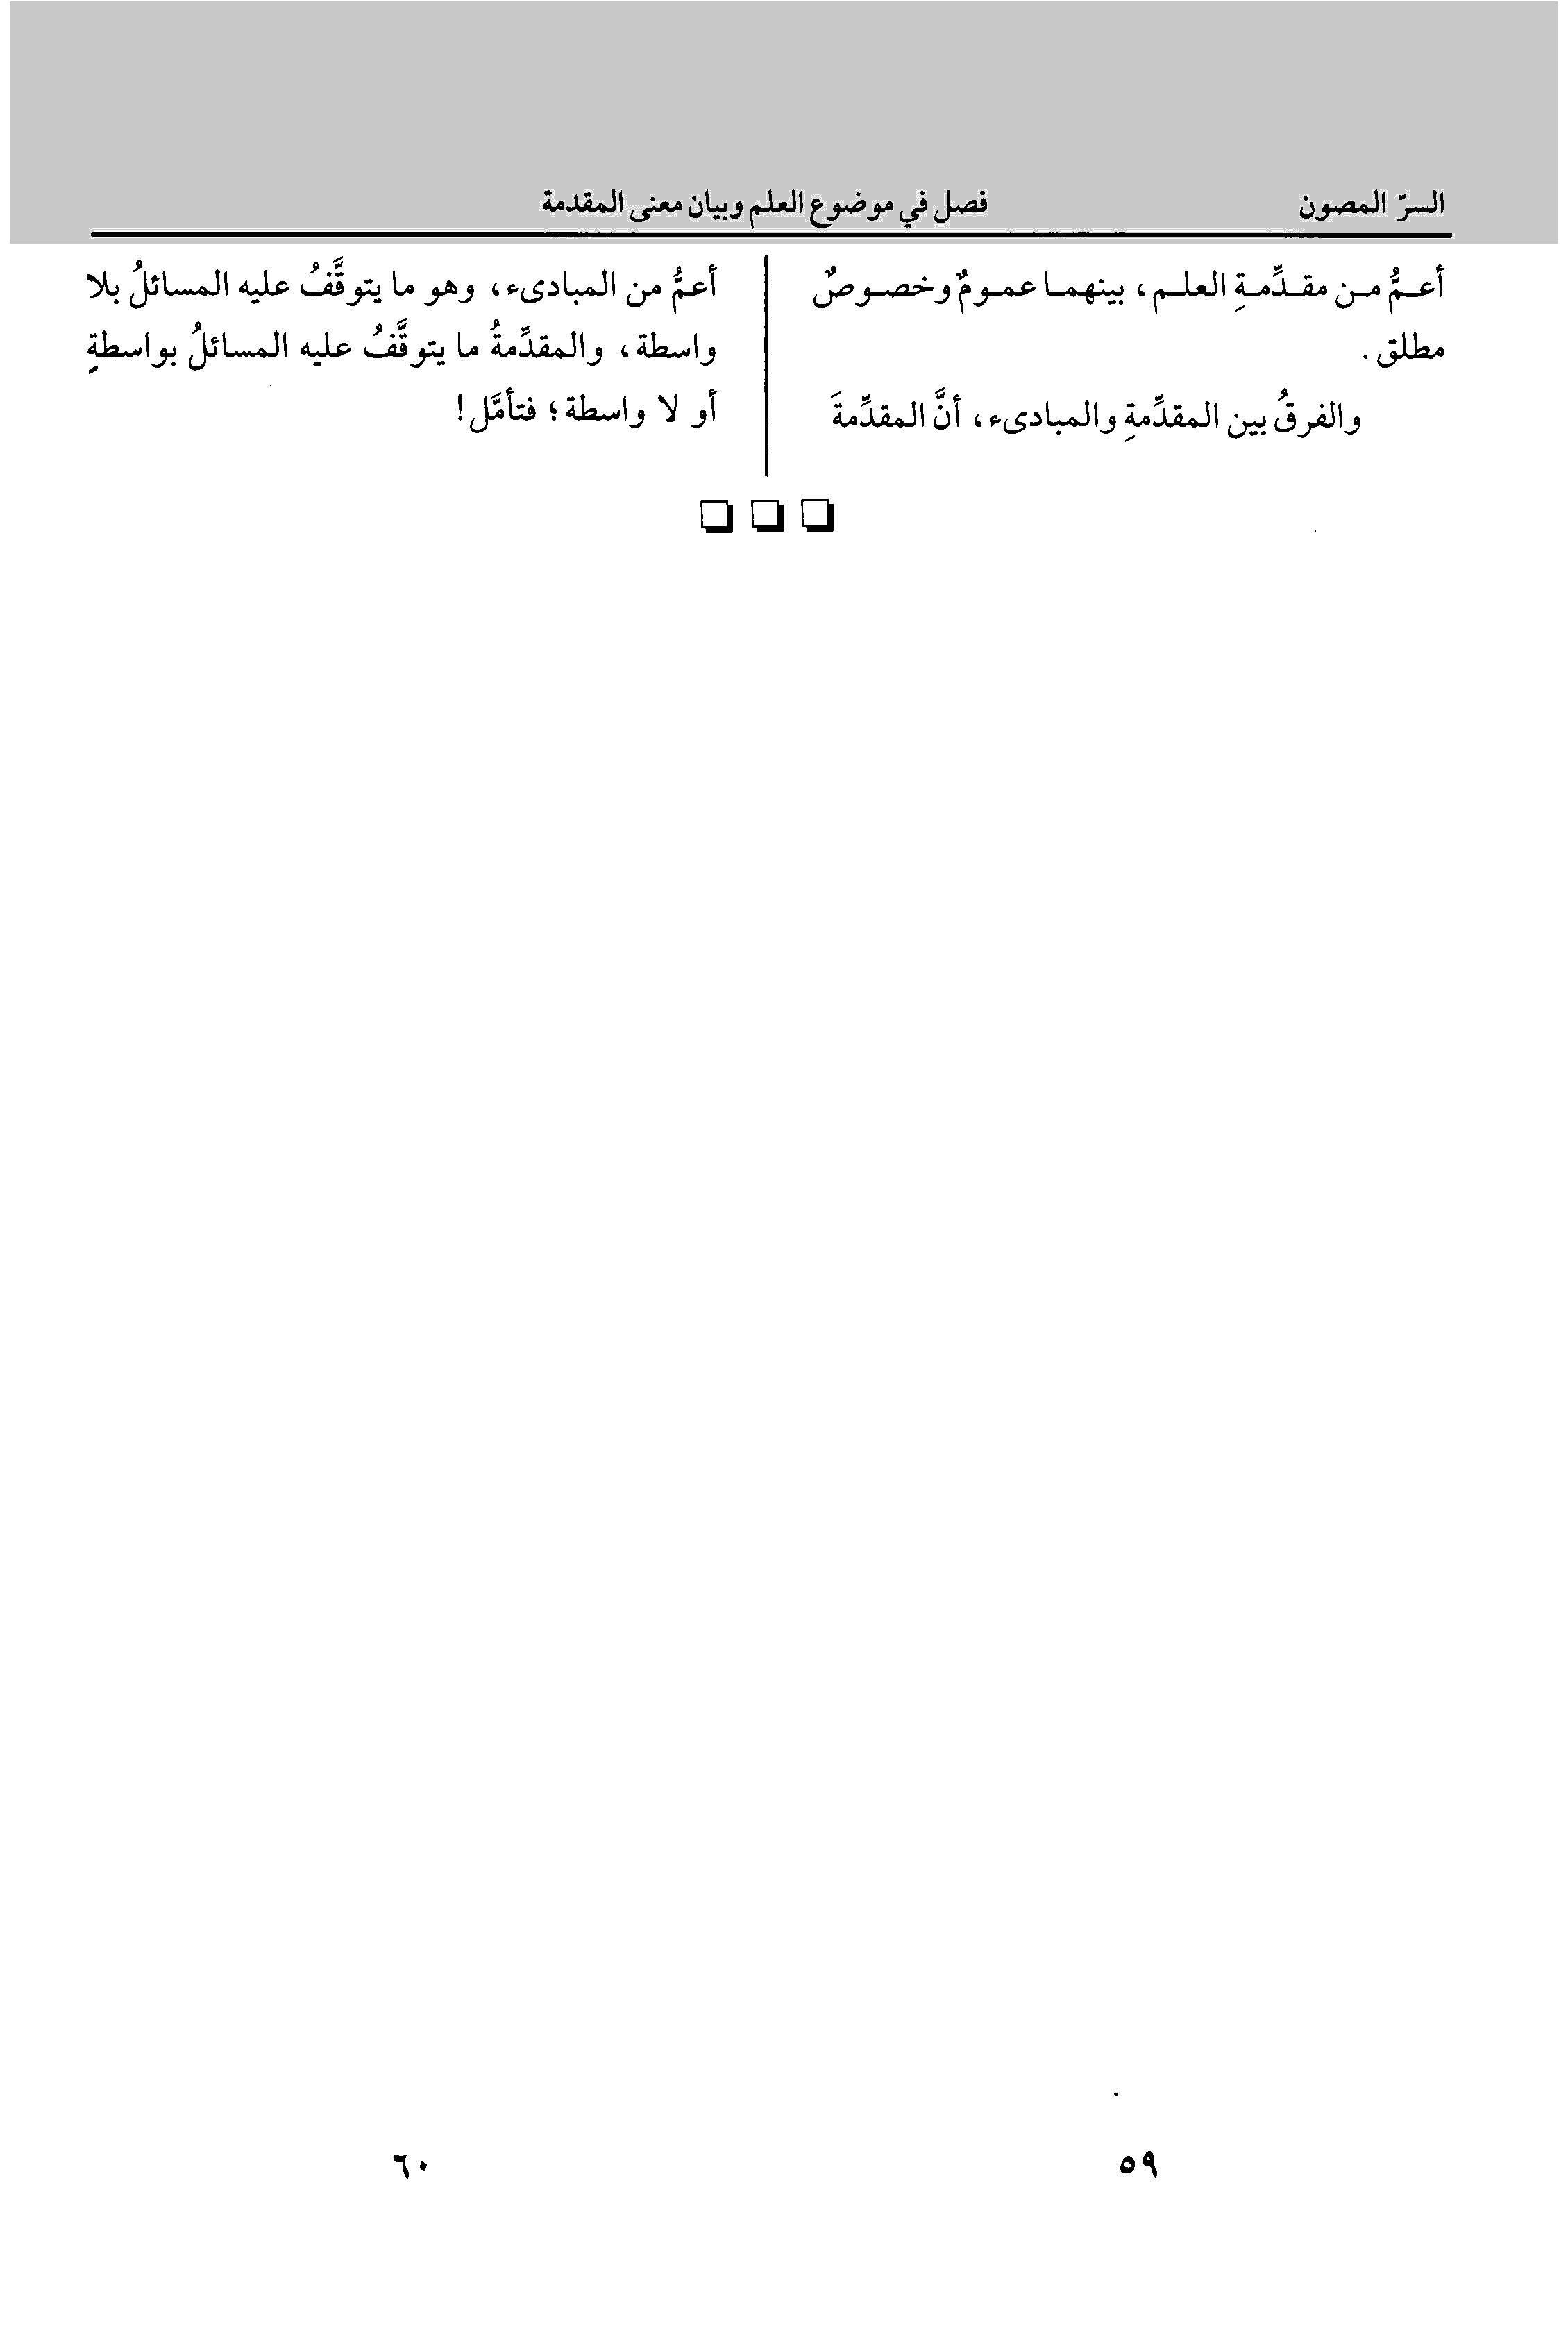

high


   |    1: a                    wiped    1 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1r] tblr=1193  560 1217  576, value= 0.81 conn=0.000 border= 4
mid


   |   20: comma2               wiped    5 x, kept    0 x
   |                            kept     0 x
   |      |   wiped [ 1l] tblr= 705  403  723  430, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 891  492  909  519, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1r] tblr=1635  404 1653  431, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1r] tblr=1400  592 1418  619, value= 0.94 conn=0.000 border= 4
   |      |   wiped [ 1l] tblr= 788  573  806  600, value= 0.94 conn=0.000 border= 4


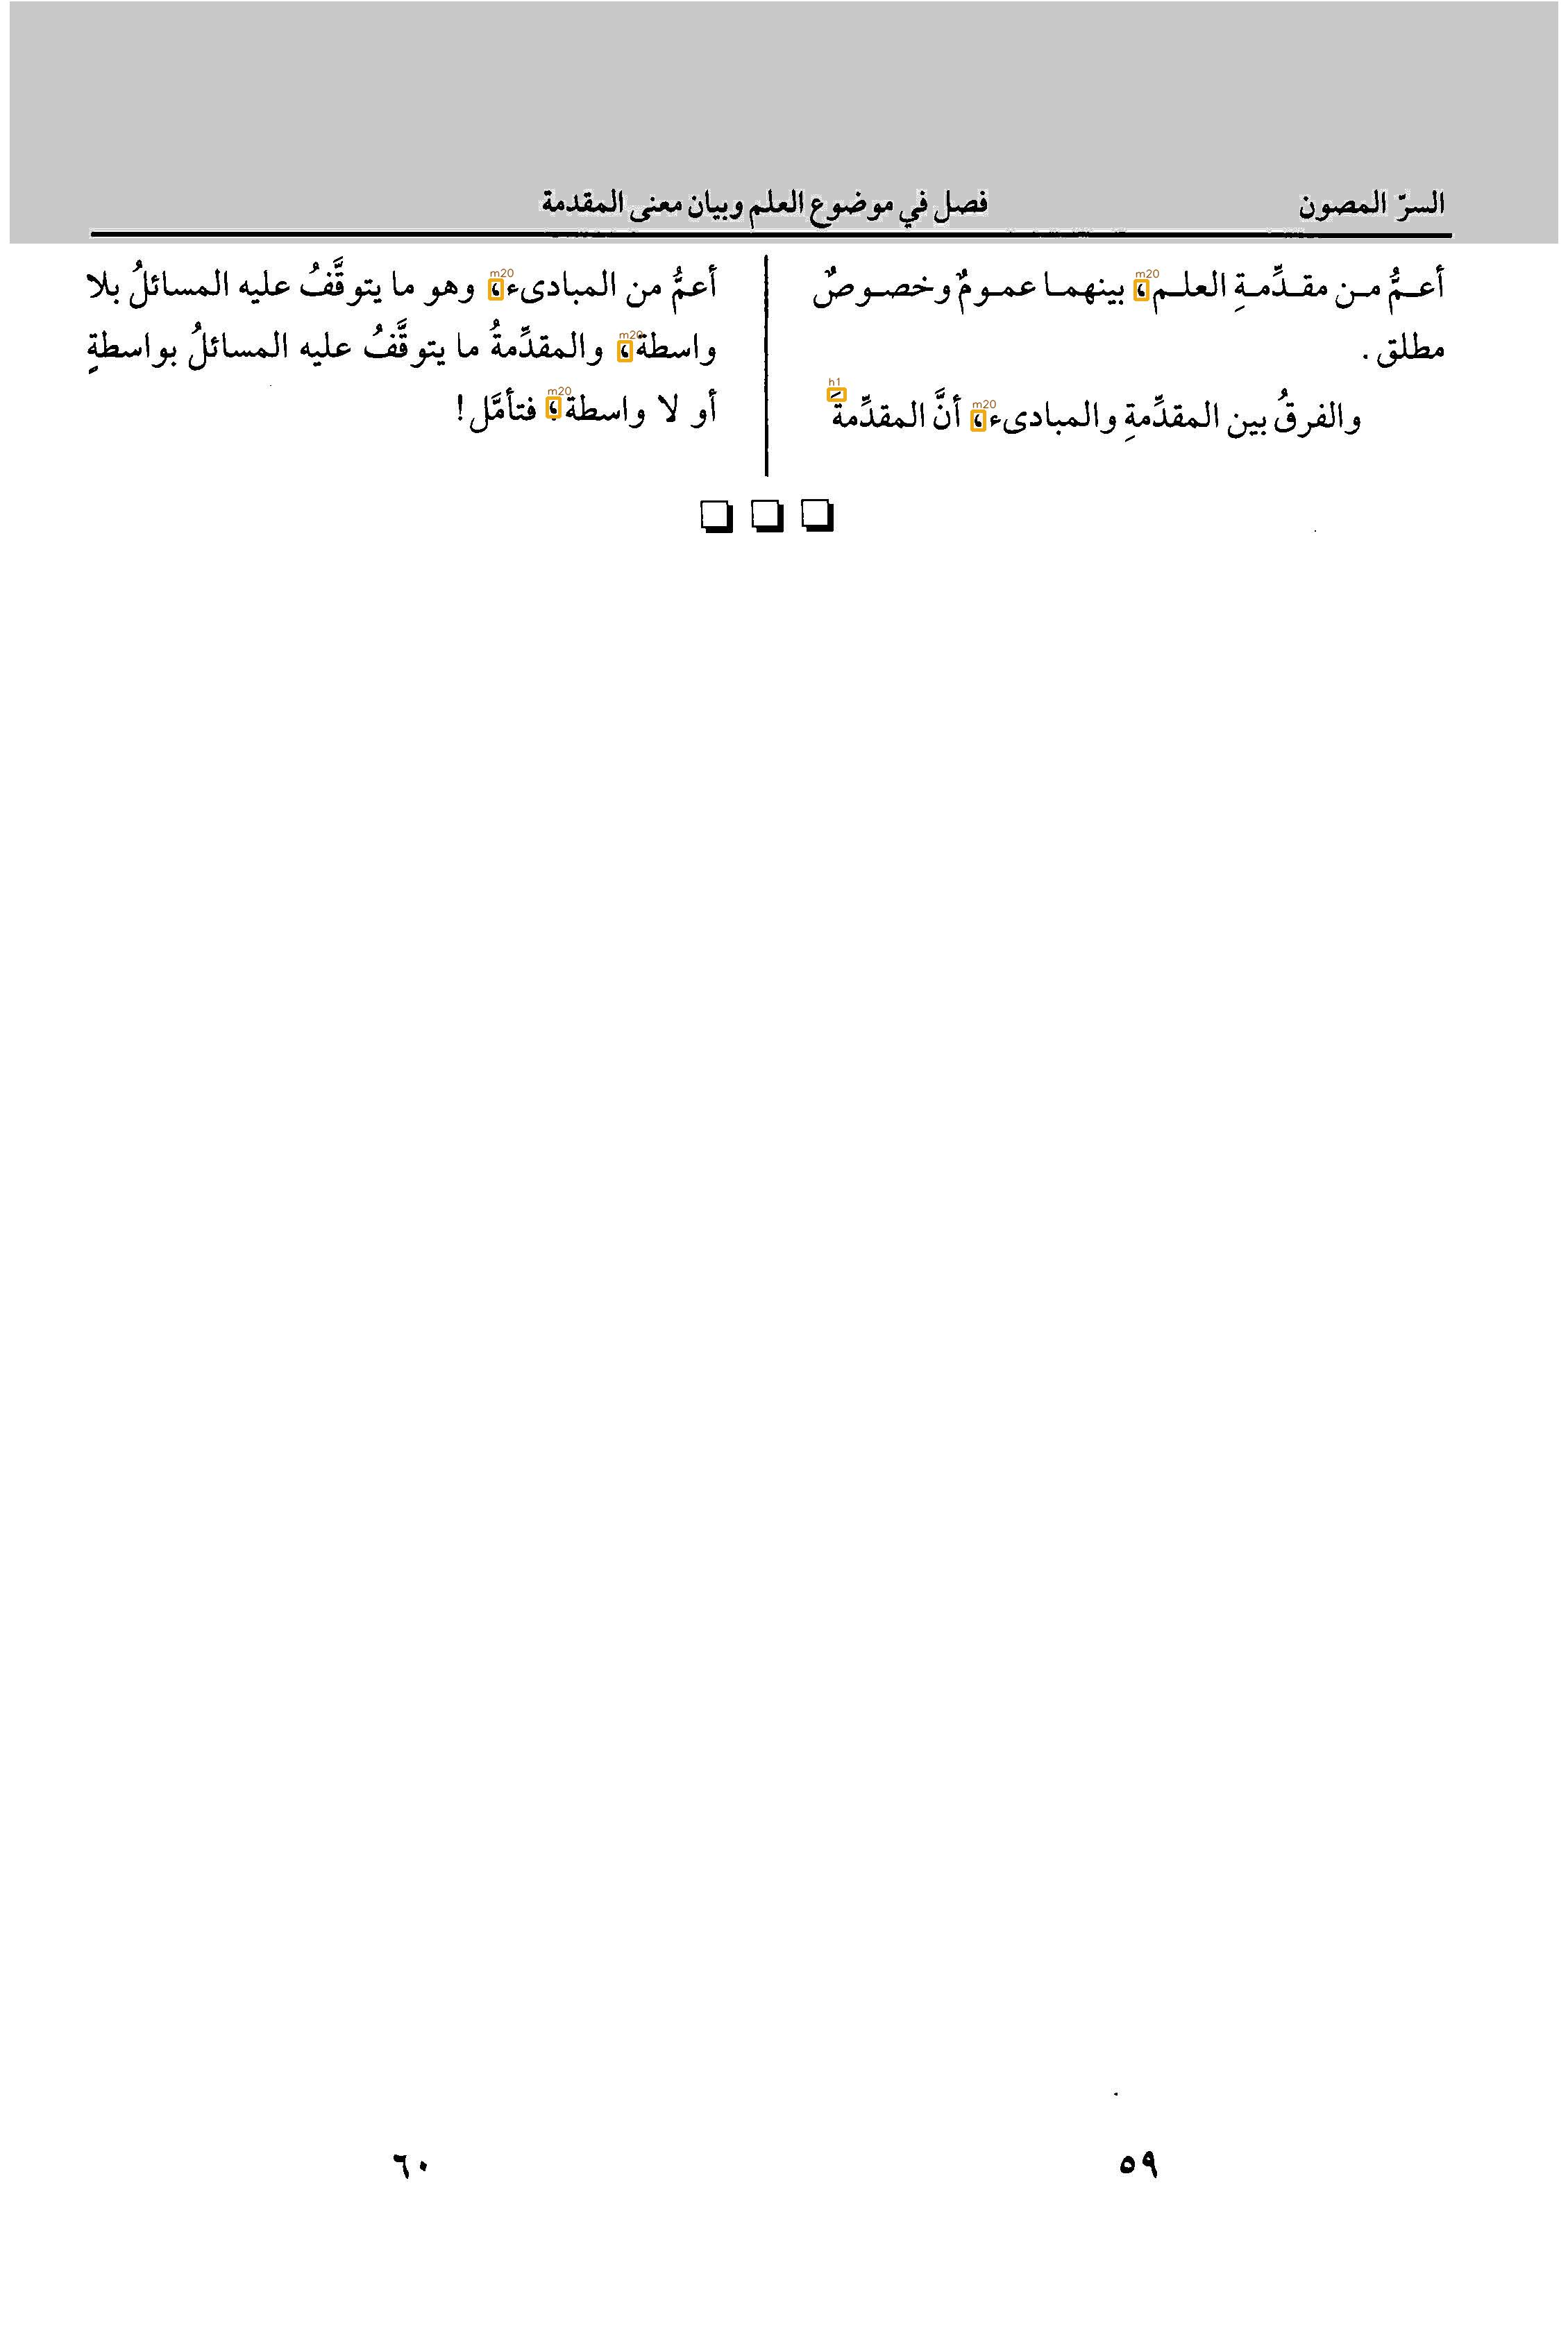

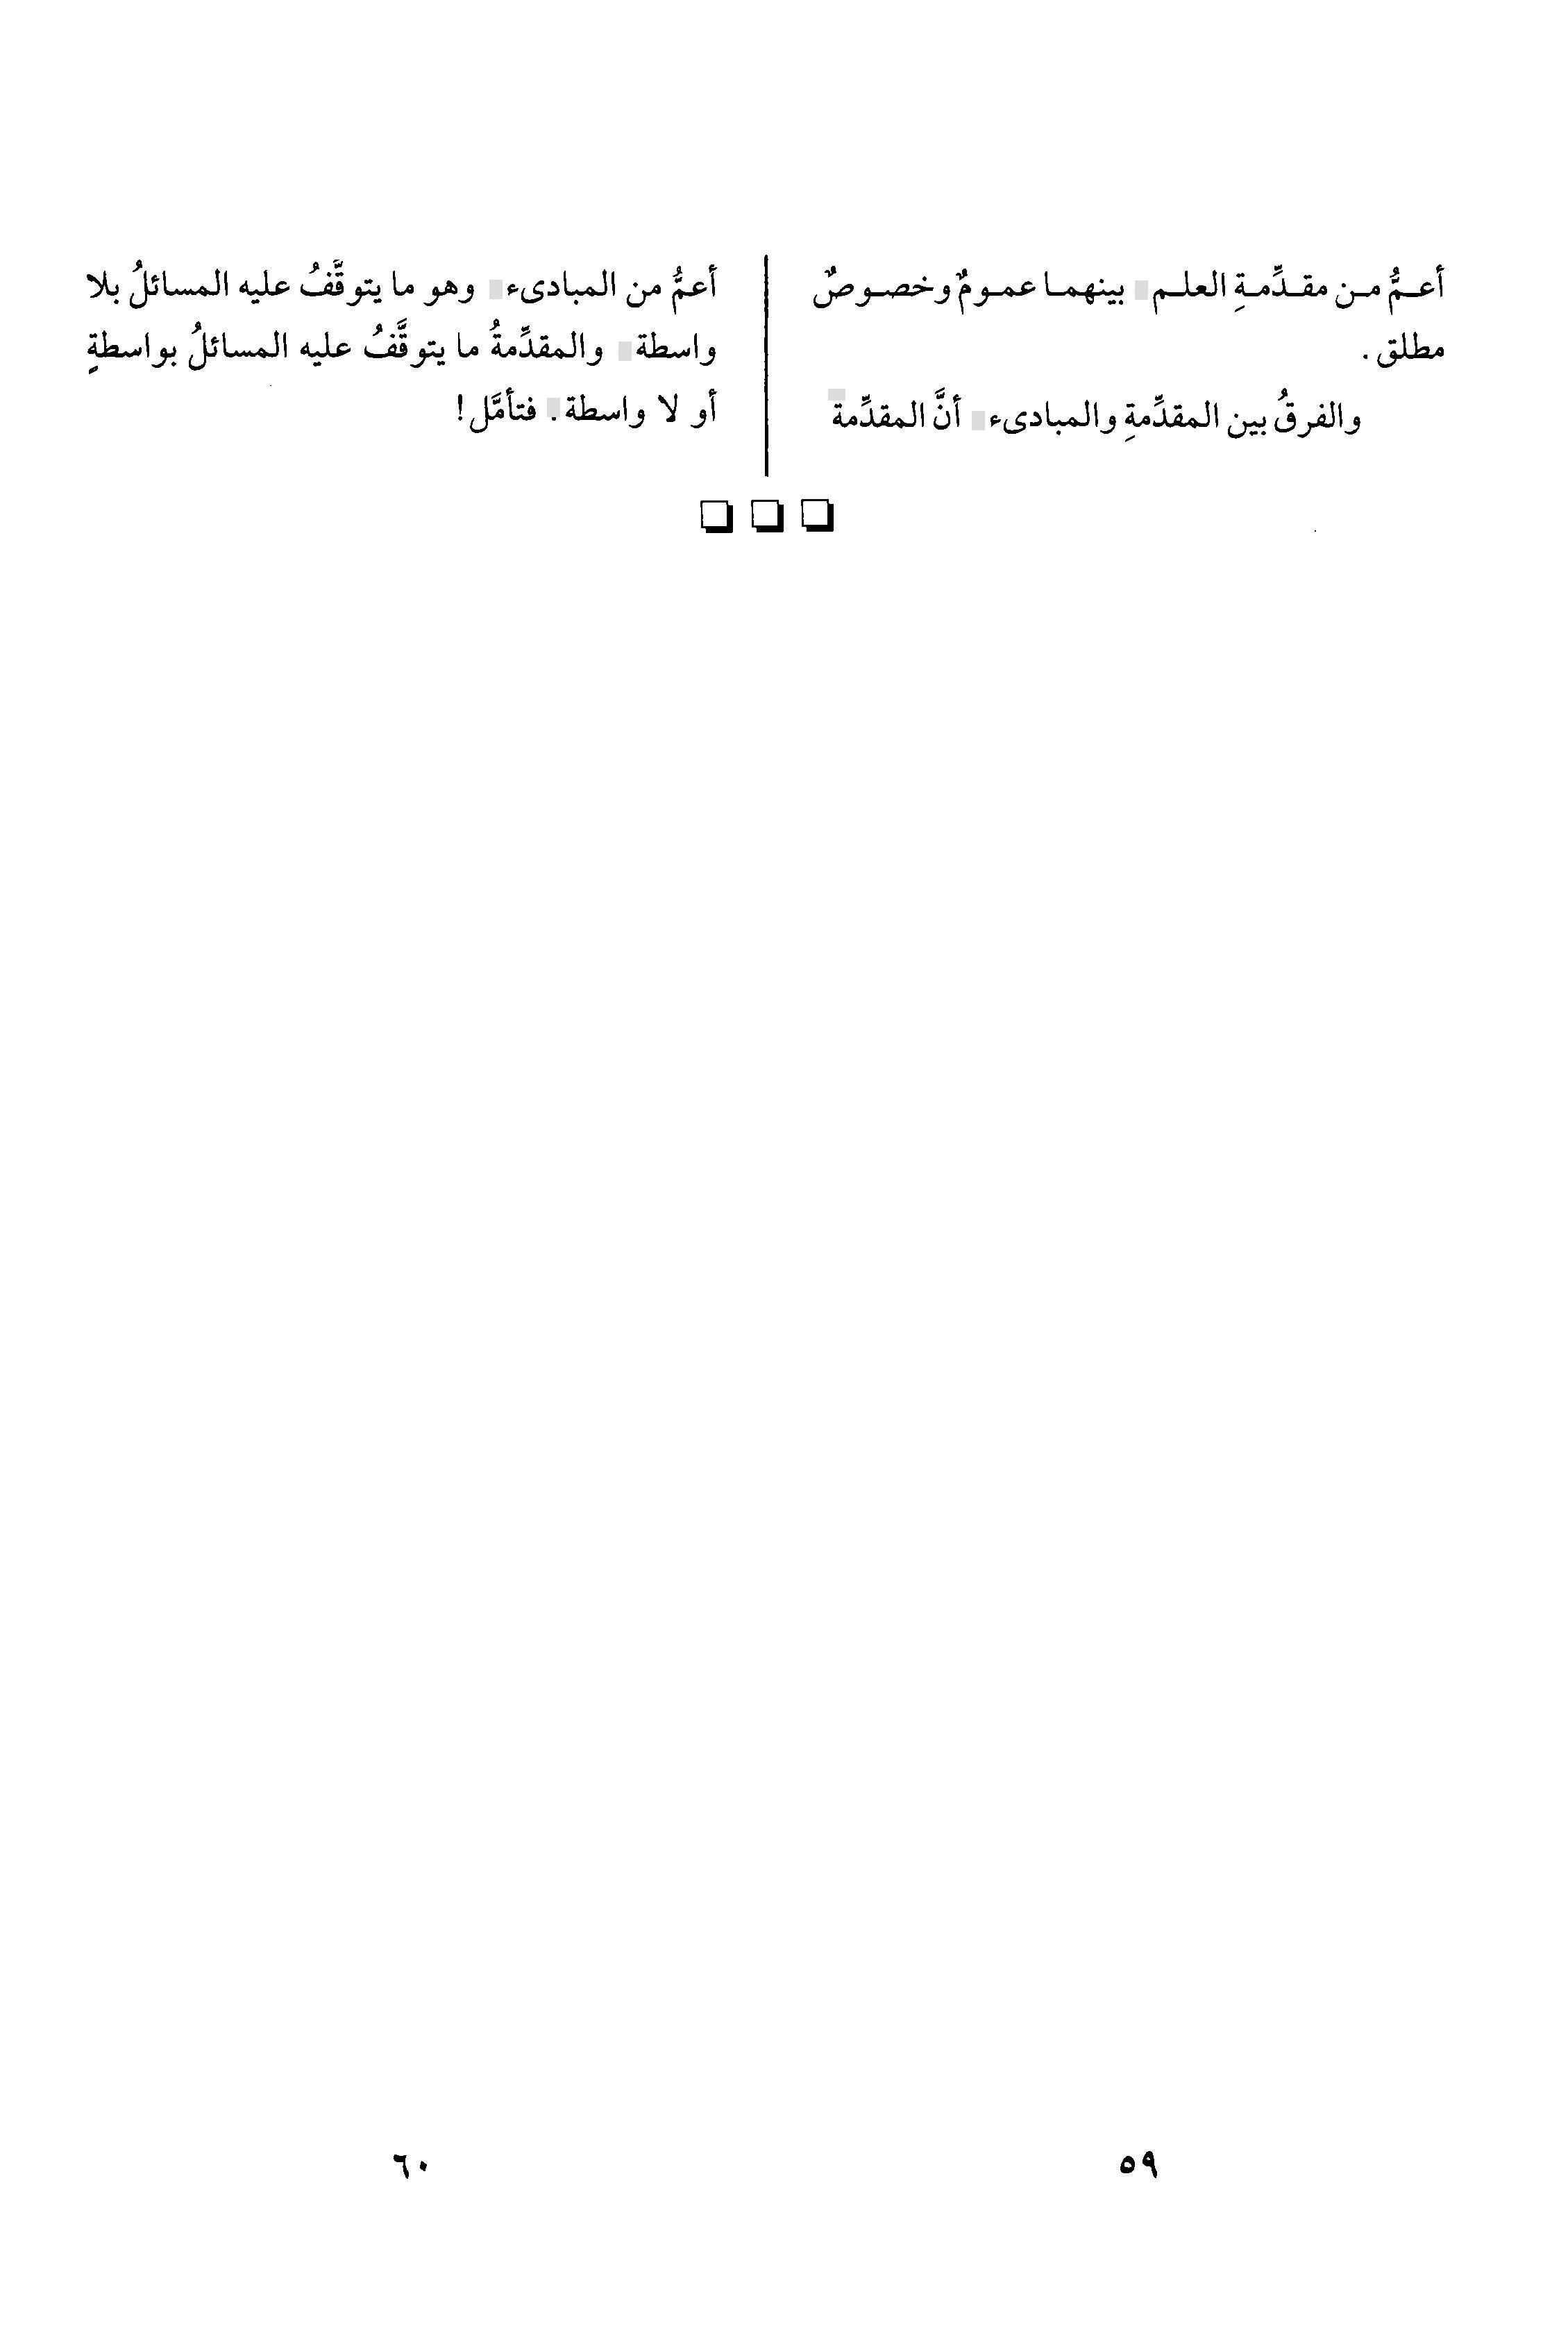

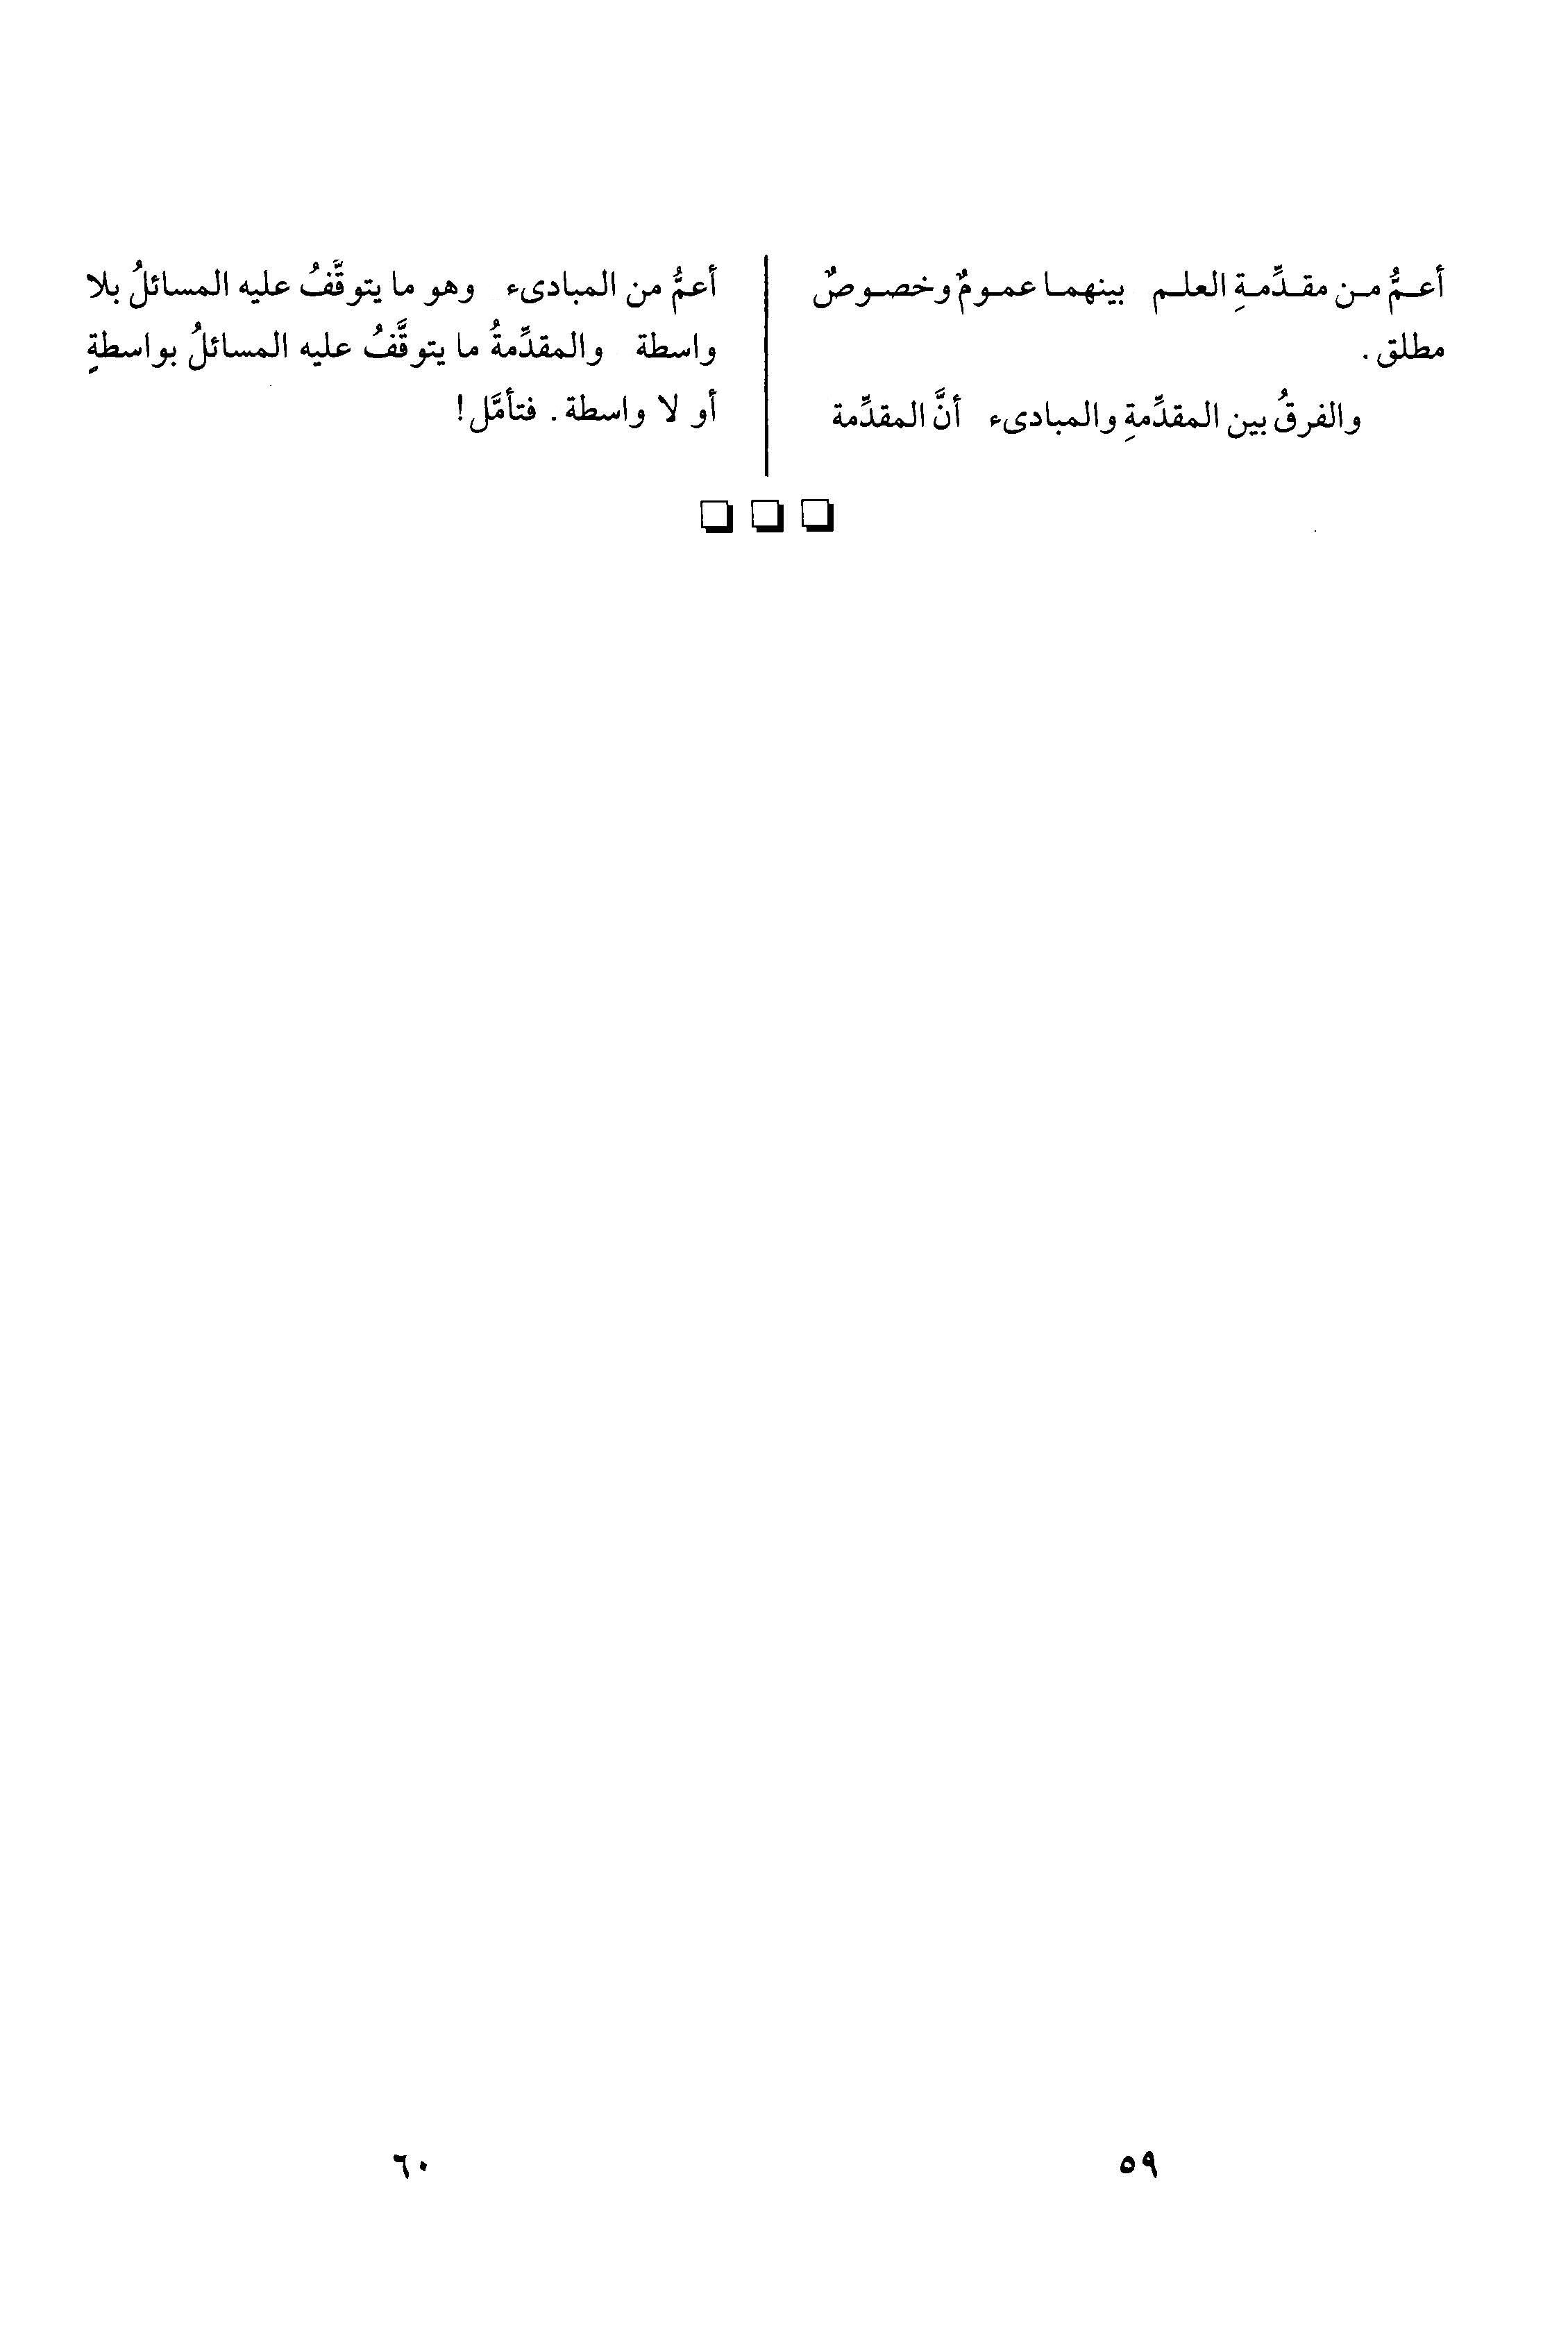

stripe	column	line	left	top	right	bottom	confidence	text
1	l	1	1024	373	1032	449	100	ا
1	l	1	1011	373	1025	449	99	ٔ
1	l	1	991	373	1011	449	100	ع
1	l	1	969	373	990	449	100	م
1	l	1	953	373	970	449	100	 
1	l	1	929	373	952	449	100	م
1	l	1	905	373	928	449	100	ن
1	l	1	887	373	904	449	100	 
1	l	1	880	373	888	449	81	ا
1	l	1	860	373	881	449	100	ل
1	l	1	840	373	860	449	77	م
1	l	1	822	373	839	449	100	ب
1	l	1	802	373	822	449	100	ا
1	l	1	781	373	801	449	53	د
1	l	1	750	373	781	449	100	ى
1	l	1	716	373	750	449	100	ء
1	l	1	681	373	716	449	100	 
1	l	1	657	373	682	449	100	و
1	l	1	634	373	658	449	99	ه
1	l	1	613	373	633	449	95	و
1	l	1	596	373	613	449	100	 
1	l	1	575	373	596	449	100	م
1	l	1	557	373	575	449	98	ا
1	l	1	548	373	558	449	100	 
1	l	1	534	373	547	449	100	ي
1	l	1	520	373	534	449	93	ت
1	l	1	499	373	520	449	100	و
1	l	1	479	373	500	449	54	ق
1	l	1	445	373	479	449	100	ف
1	l	1	414	373	444	449	100	 
1	l	1	390	373	413	449	100	ع
1	l	1	369	373	390	449	100	ل
1	l	1	356	373	369	449	100	ي
1	l	1	342	373	355	449	1

In [6]:
page.show()

# Statistics

Here is some statistics about the general quality of the OCR for this page.
See [measureOcr.ipynb](measureOcr.ipynb) for more.

In [9]:
B.measureQuality(132)

 2m 26s Batch of 1 pages: 132
 2m 26s Start measuring ocr quality of these images
   |     0.00s word-confidences of OCR results for 1 pages   


item,# of words,min,max,average,notes
overall,36,87,100,96,
p132,36,87,100,96,


   |     0.01s char-confidences of OCR results for 1 pages


item,# of chars,min,max,average,notes
overall,200,53,100,96,
p132,200,53,100,96,


   |     0.01s by-char-confidences of OCR results for 30 characters


item,# of chars,min,max,average,worst results
⌊ ⌋,29,84,100,98,p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132
⌊!⌋,1,63,63,63,p132
⌊.⌋,2,91,99,95,p132 p132
⌊0⌋,1,99,99,99,p132
⌊5⌋,1,100,100,100,p132
⌊6⌋,1,100,100,100,p132
⌊9⌋,1,66,66,66,p132
⌊ء⌋,2,59,100,80,p132 p132
⌊ا⌋,26,81,100,98,p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132 p132
item,# of chars,min,max,average,worst results


 2m 26s all done


**For developers**

If you are tweaking the generation and formatting of the proofpages, you do not need to perform the costly OCR process over and over again.
The following method regenerates the proof pages on the basis of the existing OCR data.

In [10]:
page.proofing()

# Check all pages

Now we check all example pages in batch

In [11]:
page = checkOcr(None)

  0.00s Batch of 1 pages: 47
  0.00s Start batch processing images
   |     5.52s     1 047.tif                                 
  5.52s all done


  0.00s Batch of 1 pages: 48
  0.00s Start batch processing images
   |     5.36s     1 048.tif                                 
  5.37s all done


  0.00s Batch of 1 pages: 58
  0.00s Start batch processing images
   |     5.40s     1 058.tif                                 
  5.40s all done


  0.00s Batch of 1 pages: 59
  0.00s Start batch processing images
   |     6.61s     1 059.tif                                 
  6.61s all done


  0.00s Batch of 1 pages: 63
  0.00s Start batch processing images
   |     6.76s     1 063.tif                                 
  6.76s all done


  0.00s Batch of 1 pages: 67
  0.00s Start batch processing images
   |     6.38s     1 067.tif                                 
  6.39s all done


  0.00s Batch of 1 pages: 101
  0.00s Start batch processing images
   |     4.70s     1 101.jpg                                 
  4.70s all done


  0.00s Batch of 1 pages: 102
  0.00s Start batch processing images
   |     5.94s     1 102.jpg                                 
  5.94s all done


  0.00s Batch of 1 pages: 111
  0.00s Start batch processing images
   |     6.68s     1 111.jpg                                 
  6.68s all done


  0.00s Batch of 1 pages: 112
  0.00s Start batch processing images
   |     8.04s     1 112.jpg                                 
  8.05s all done


  0.00s Batch of 1 pages: 113
  0.00s Start batch processing images
   |     7.29s     1 113.jpg                                 
  7.29s all done


  0.00s Batch of 1 pages: 121
  0.00s Start batch processing images
   |     6.79s     1 121.jpg                                 
  6.79s all done


  0.00s Batch of 1 pages: 122
  0.00s Start batch processing images
   |     5.79s     1 122.jpg                                 
  5.79s all done


  0.00s Batch of 1 pages: 131
  0.00s Start batch processing images
   |     9.74s     1 131.jpg                                 
  9.75s all done


  0.00s Batch of 1 pages: 132
  0.00s Start batch processing images
   |     5.69s     1 132.jpg                                 
  5.69s all done


  0.00s Batch of 1 pages: 200
  0.00s Start batch processing images
   |       38s     1 200.tif                                 
    38s all done


  0.00s Batch of 1 pages: 300
  0.00s Start batch processing images
   |       26s     1 300.tif                                 
    26s all done


  0.00s Batch of 1 pages: 400
  0.00s Start batch processing images
   |       30s     1 400.tif                                 
    30s all done


  0.00s Batch of 1 pages: 999
  0.00s Start batch processing images
   |     0.52s     1 999.jpg                                 
  0.52s all done
